# A Quick Tutorial of Taking Numerical Derivative of Noisy Data with PyNumDiff

This notebook walks through each of the methods implemented in PyNumDiff.

### Notations:
  * dt: (float) time step
  * x: (np.array with length N) the noisy time series you want to differentiate
  * x_hat: (np.array like x) the smoothed estimate of x
  * x_truth: (np.array like x) the true value of x (which is accessible when the data is simulated, and used for plotting purposes only)
  * dxdt_hat: (np.array like x) the estimate of the derivative of x
  * dxdt_truth: (np.array like x) the true value of dxdt (which is accessible when the data is simulated, and used for plotting purposes only)

In [1]:
import os, sys

# local import
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pynumdiff
from pynumdiff.utils import simulate, evaluate

## 0. Simulate synthetic data

### PyNumDiff comes with 6 different toy problems:
* lorenz_x: (nonlinear) x component of a lorenz attractor
* sine: (linear) sum of two sines
* linear_autonomous: (linear) linear time invariant system: dx/dt = Ax  
* pop_dyn: (nonlinear) bounded exponential growth
* triangle: (nonlinear) sharp-edged triangle wave with increasing frequency
* pi_cruise_control: (linear / nonlinear) linear proportional integral controller with nonlinear control inputs

In [2]:
# noise is generated using np.random, e.g. 'normal', 'uniform', 'poisson'
# noise_type and noise_parameters should be compatible with np.random functions 
noise_type = 'normal'
noise_parameters = [0, 0.1]  # mean and std

# time step size and time series length in TIME
dt = 0.01
duration = 4

x, x_truth, dxdt_truth = simulate.pi_cruise_control(duration=duration, dt=dt, 
                                                noise_type=noise_type, noise_parameters=noise_parameters)

## 1. Smooth Finite Difference

### 1.1 Mean smoothing

RMS error in velocity:  0.9392208896320581
Error correlation:  0.5283264983012727


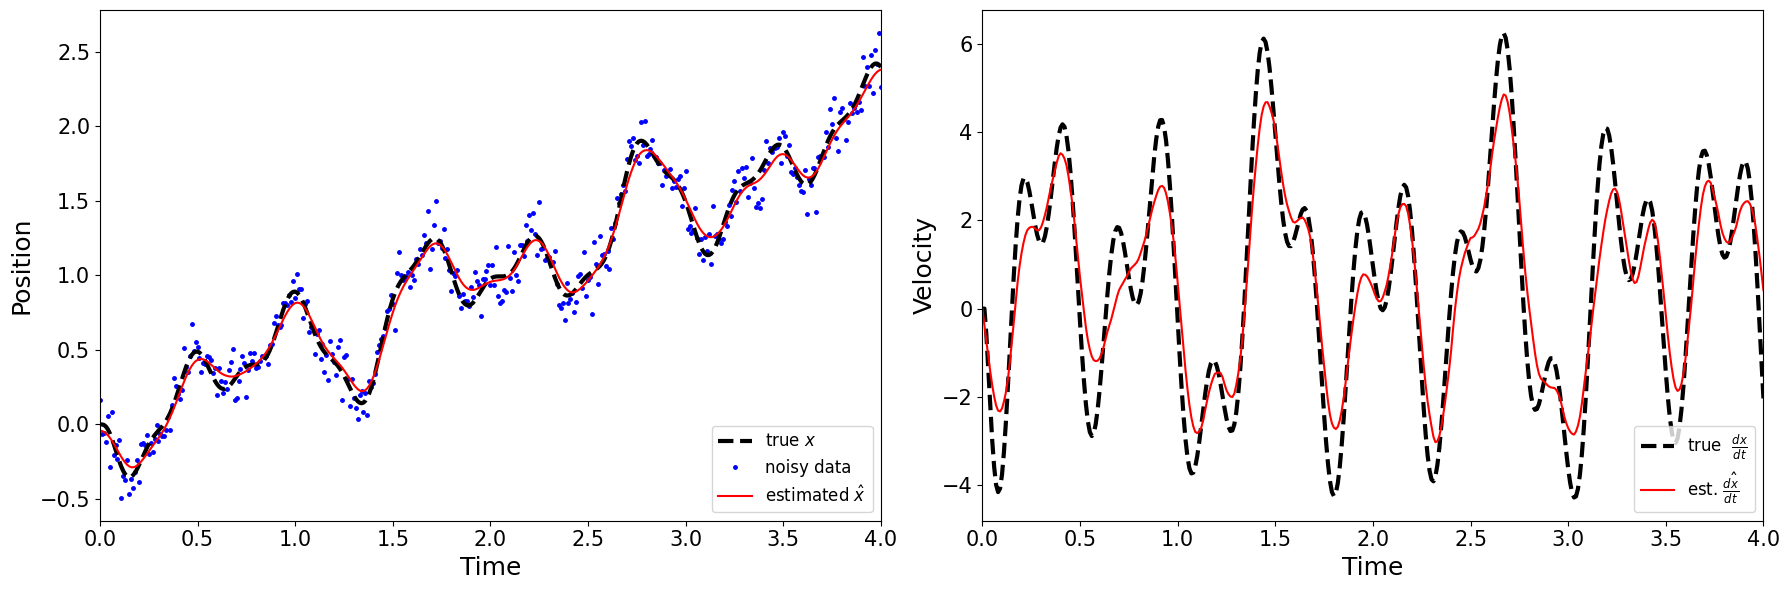

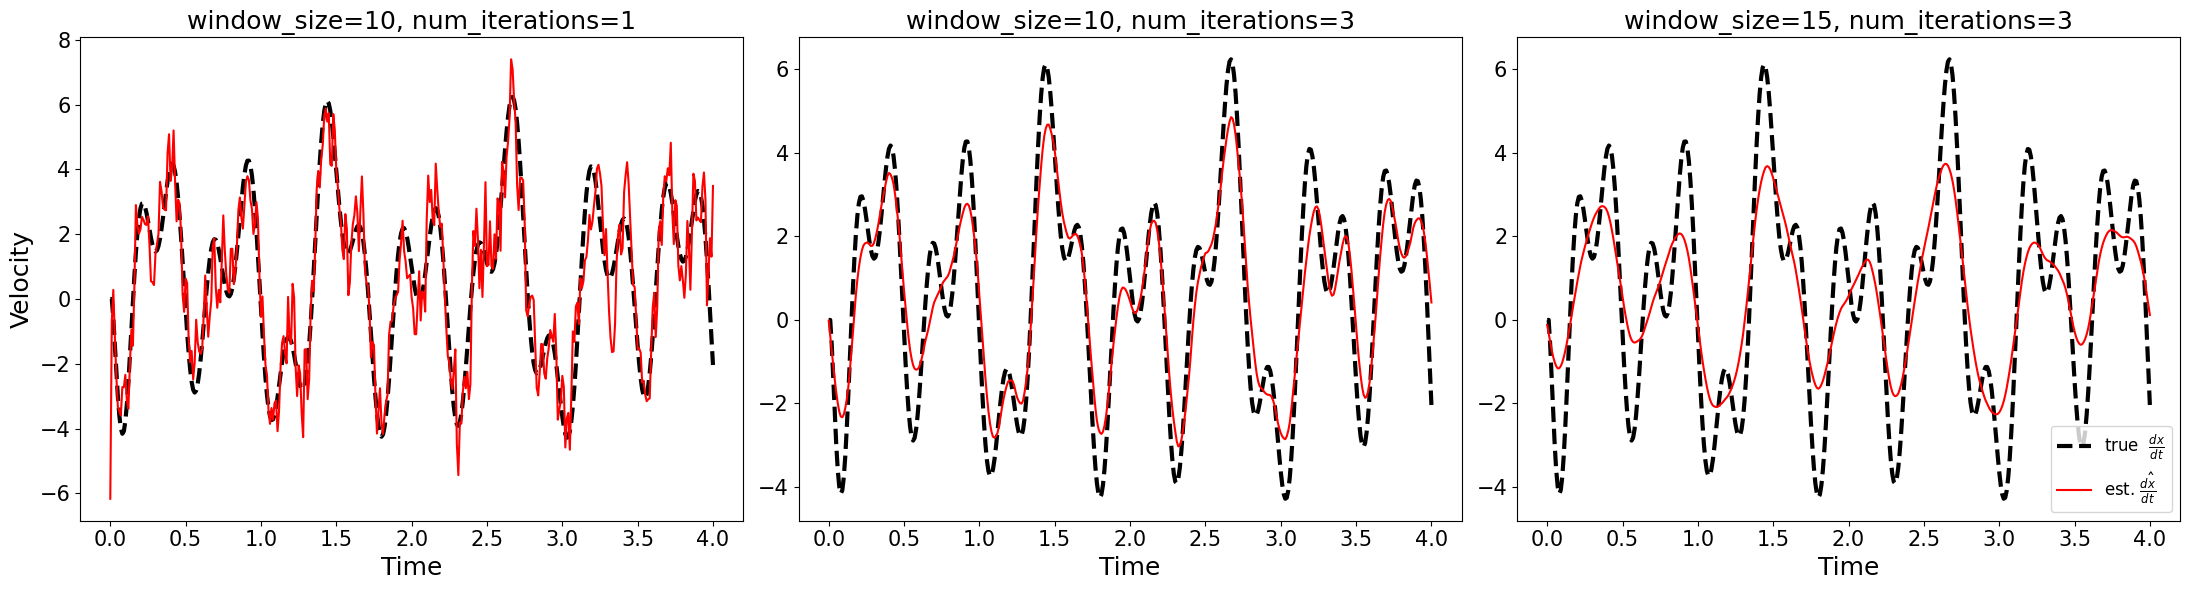

In [7]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.meandiff(x, dt, window_size=10, num_iterations=3)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

_, dxdt_hat1 = pynumdiff.smooth_finite_difference.meandiff(x, dt, window_size=10, num_iterations=1)
_, dxdt_hat2 = pynumdiff.smooth_finite_difference.meandiff(x, dt, window_size=10, num_iterations=3)
_, dxdt_hat3 = pynumdiff.smooth_finite_difference.meandiff(x, dt, window_size=15, num_iterations=3)

evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'window_size=10, num_iterations=1',
                         dxdt_hat2, 'window_size=10, num_iterations=3',
                         dxdt_hat3, 'window_size=15, num_iterations=3')

### 1.2 Median smoothing

RMS error in velocity:  1.8262250704853433
Error correlation:  0.2104358532168965


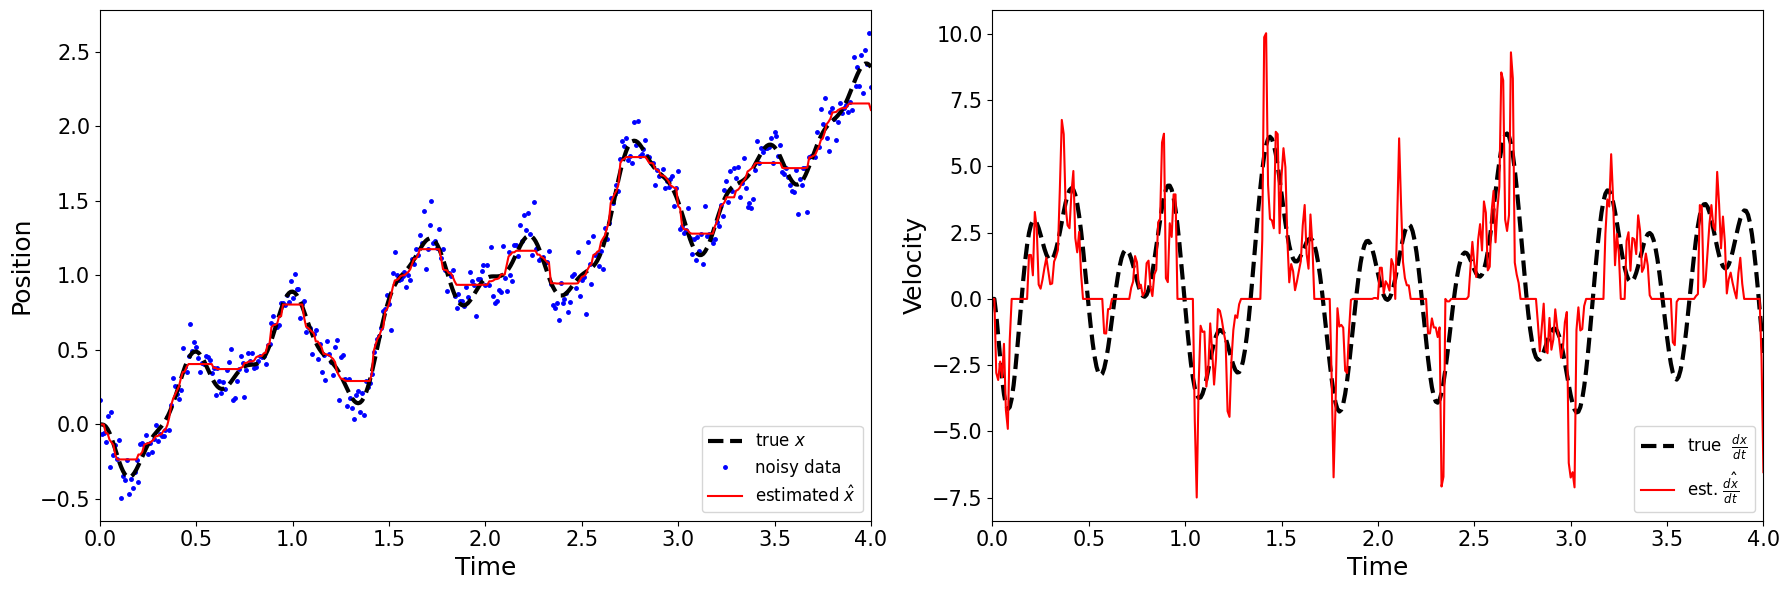

In [8]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.mediandiff(x, dt, window_size=20, num_iterations=4)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.3 Gaussian smoothing

RMS error in velocity:  0.6456841747296548
Error correlation:  0.23960833068050716


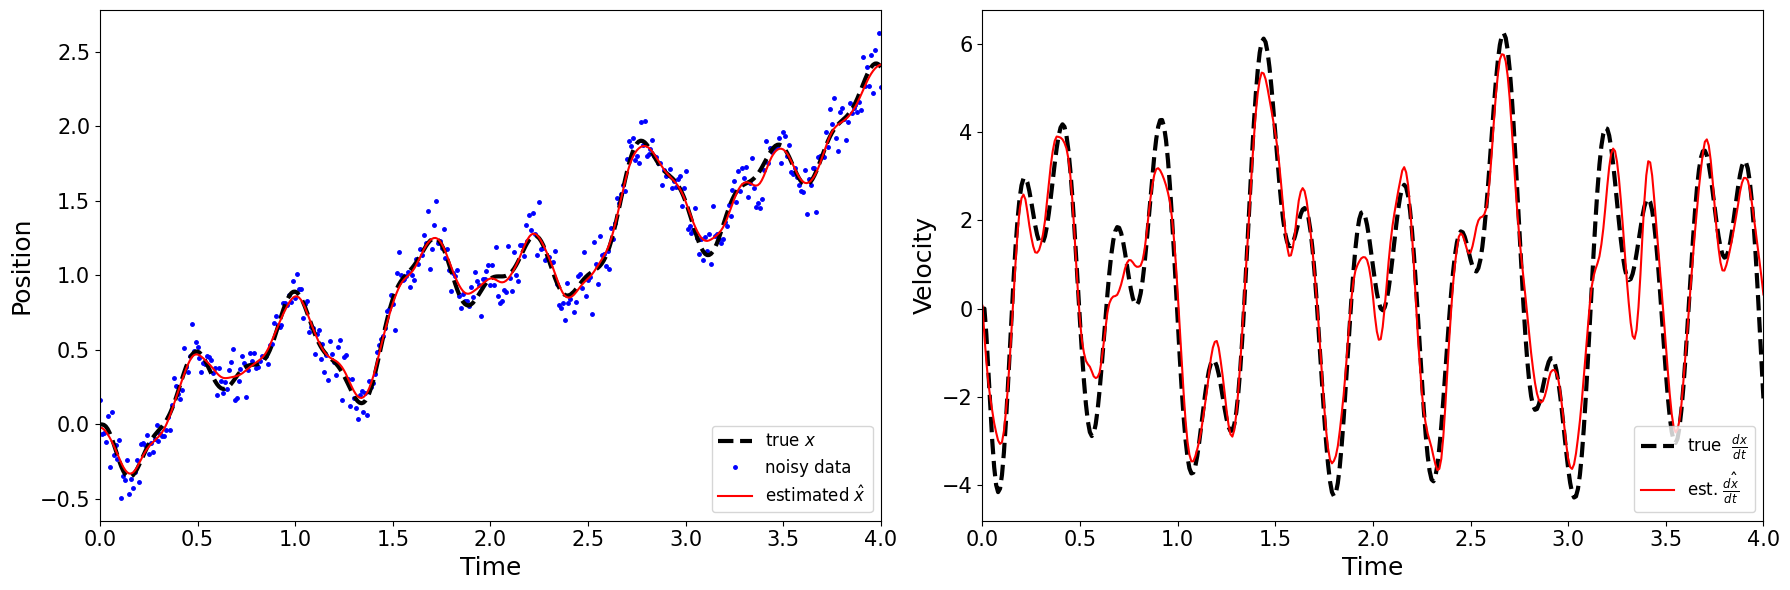

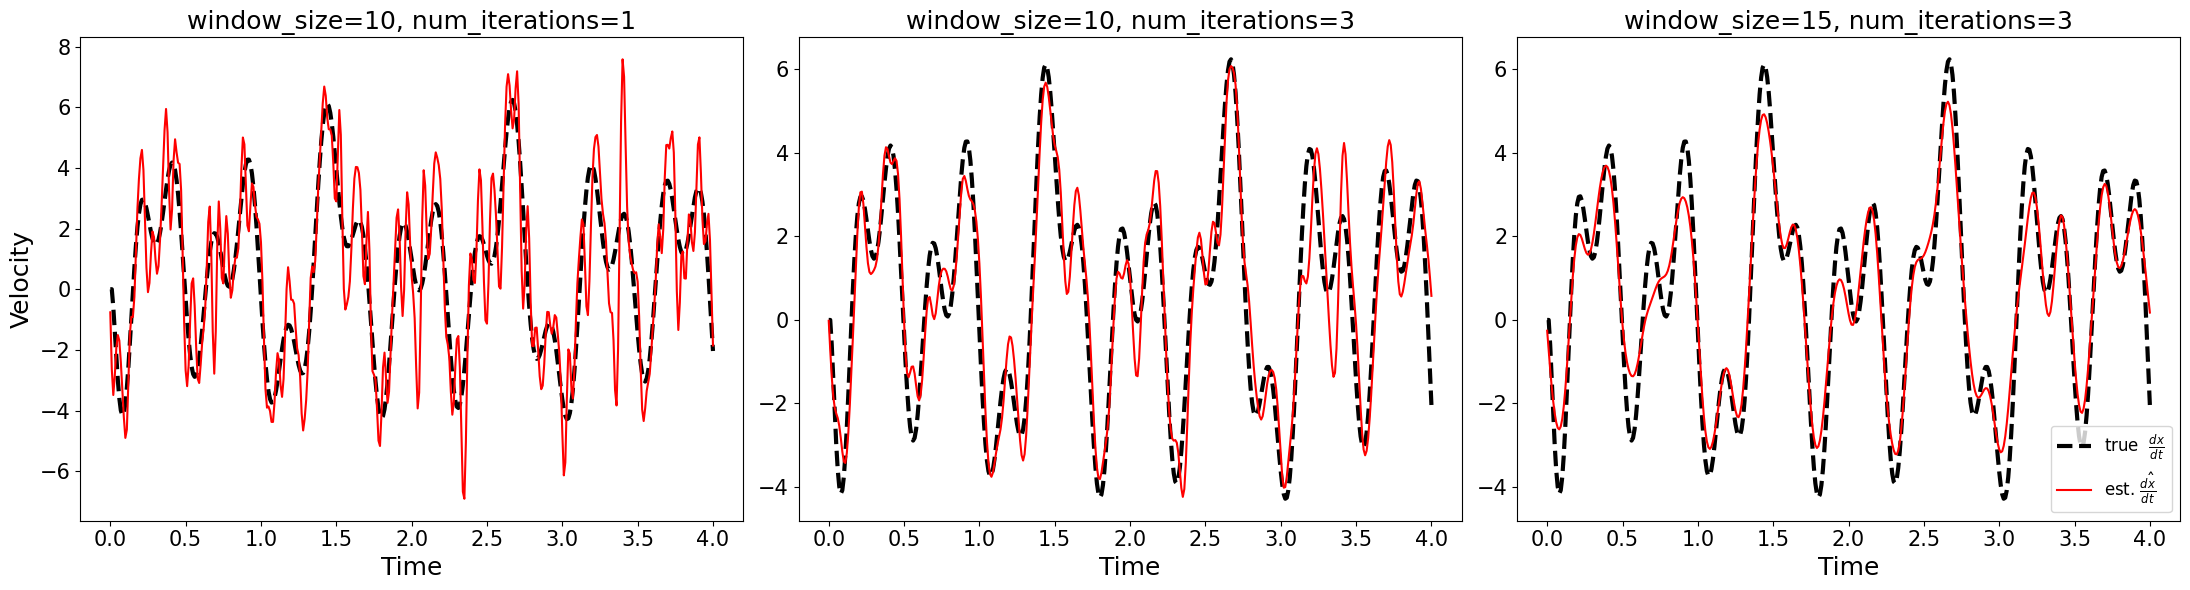

In [9]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, window_size=20)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

_, dxdt_hat1 = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, window_size=10, num_iterations=1)
_, dxdt_hat2 = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, window_size=10, num_iterations=3)
_, dxdt_hat3 = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, window_size=15, num_iterations=3)

evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'window_size=10, num_iterations=1',
                         dxdt_hat2, 'window_size=10, num_iterations=3',
                         dxdt_hat3, 'window_size=15, num_iterations=3')

### 1.4 Friedrichs smoothing

RMS error in velocity:  1.244128487047342
Error correlation:  0.0010635966774258097


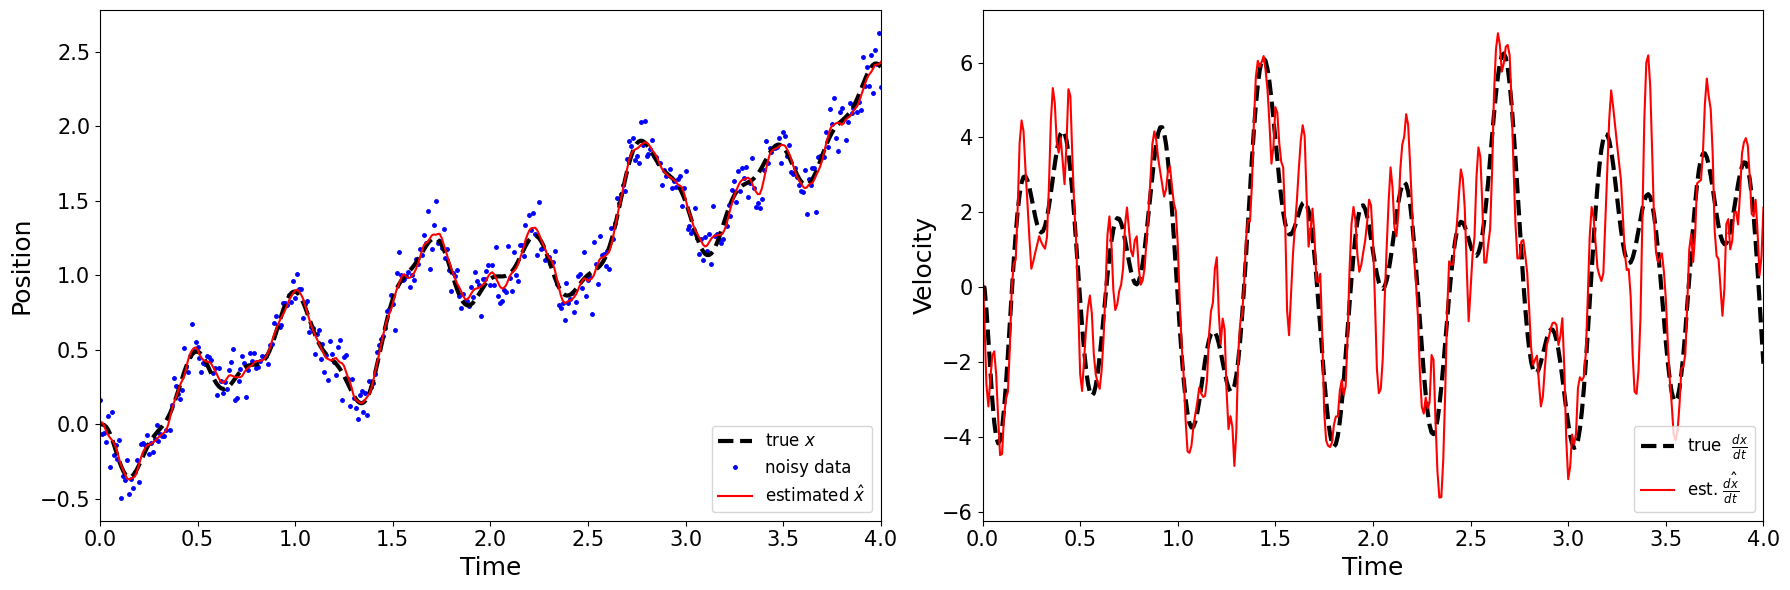

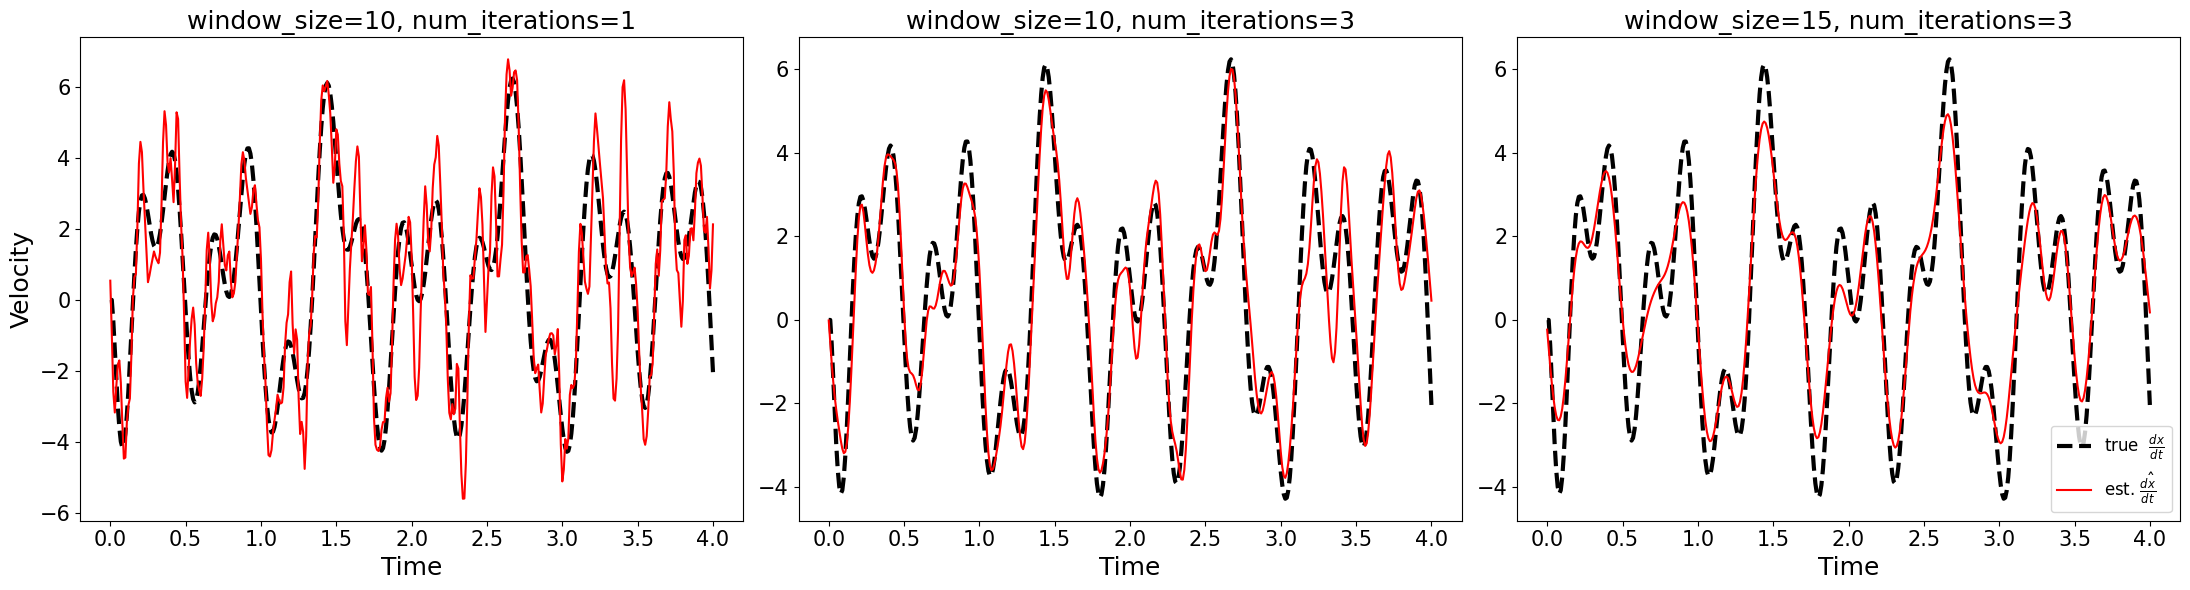

In [10]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, window_size=10)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

_, dxdt_hat1 = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, window_size=10, num_iterations=1)
_, dxdt_hat2 = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, window_size=10, num_iterations=3)
_, dxdt_hat3 = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, window_size=15, num_iterations=3)

evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'window_size=10, num_iterations=1',
                         dxdt_hat2, 'window_size=10, num_iterations=3',
                         dxdt_hat3, 'window_size=15, num_iterations=3')

### 1.5 Butterworth smoothing

RMS error in velocity:  0.7586871908288048
Error correlation:  0.07372647979776914


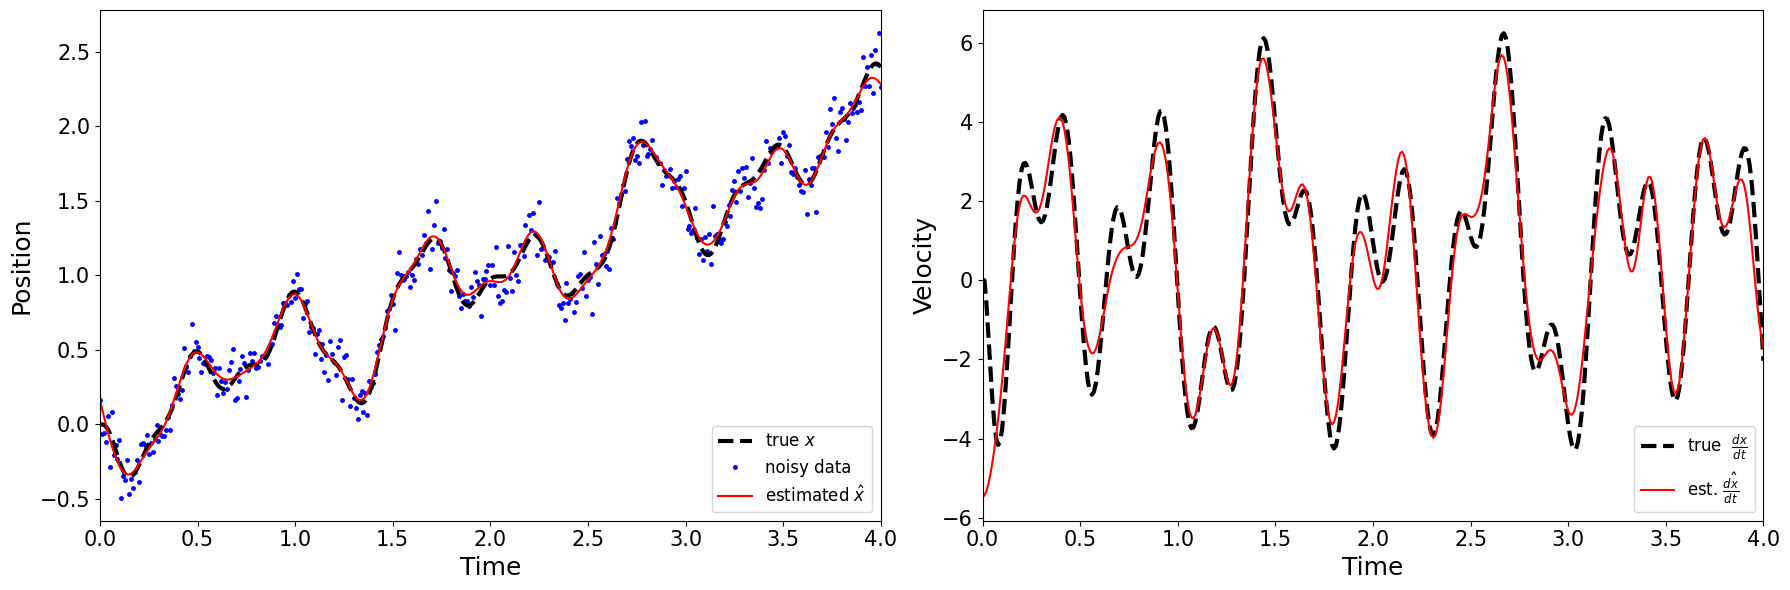

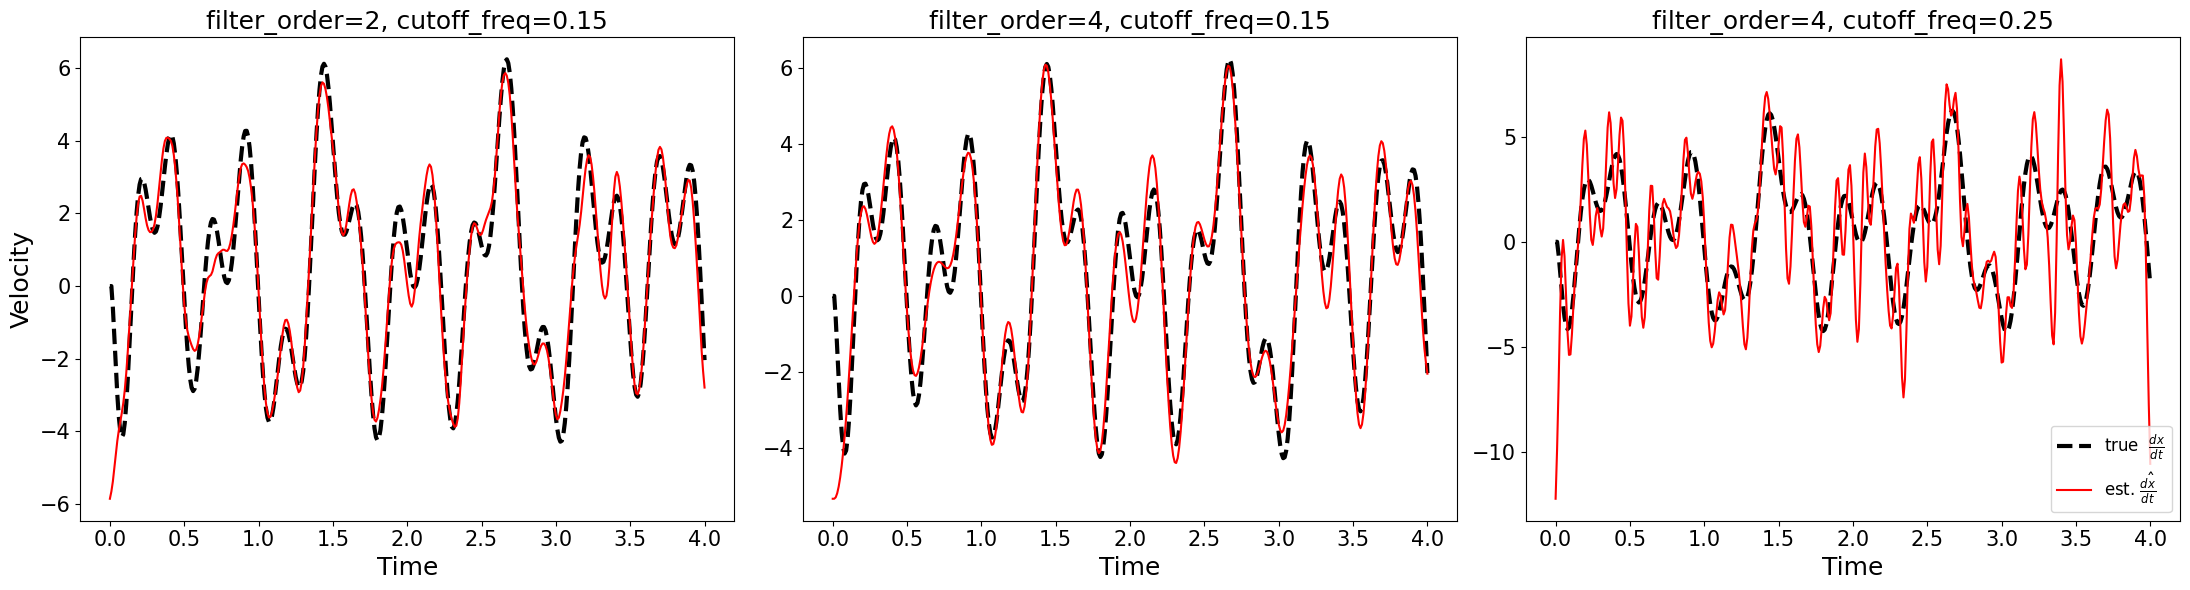

In [11]:
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.butterdiff(x, dt, filter_order=3, cutoff_freq=0.09)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

_, dxdt_hat1 = pynumdiff.smooth_finite_difference.butterdiff(x, dt, filter_order=2, cutoff_freq=0.1)
_, dxdt_hat2 = pynumdiff.smooth_finite_difference.butterdiff(x, dt, filter_order=4, cutoff_freq=0.1)
_, dxdt_hat3 = pynumdiff.smooth_finite_difference.butterdiff(x, dt, filter_order=4, cutoff_freq=0.25)

evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'filter_order=2, cutoff_freq=0.15',
                         dxdt_hat2, 'filter_order=4, cutoff_freq=0.15',
                         dxdt_hat3, 'filter_order=4, cutoff_freq=0.25')

## 2. Polynomial Fit

### 2.1 Splines

RMS error in velocity:  1.0263038613344047
Error correlation:  0.044537325740607626


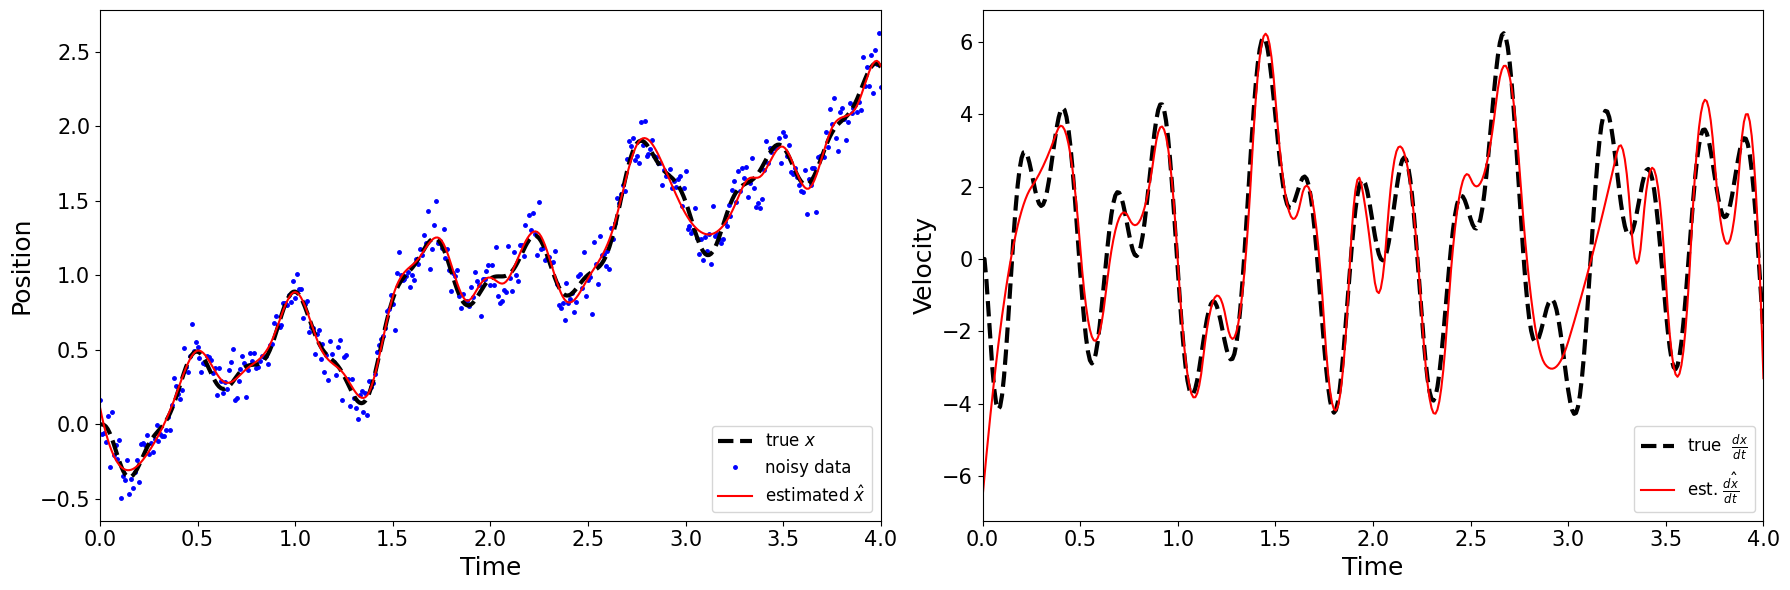

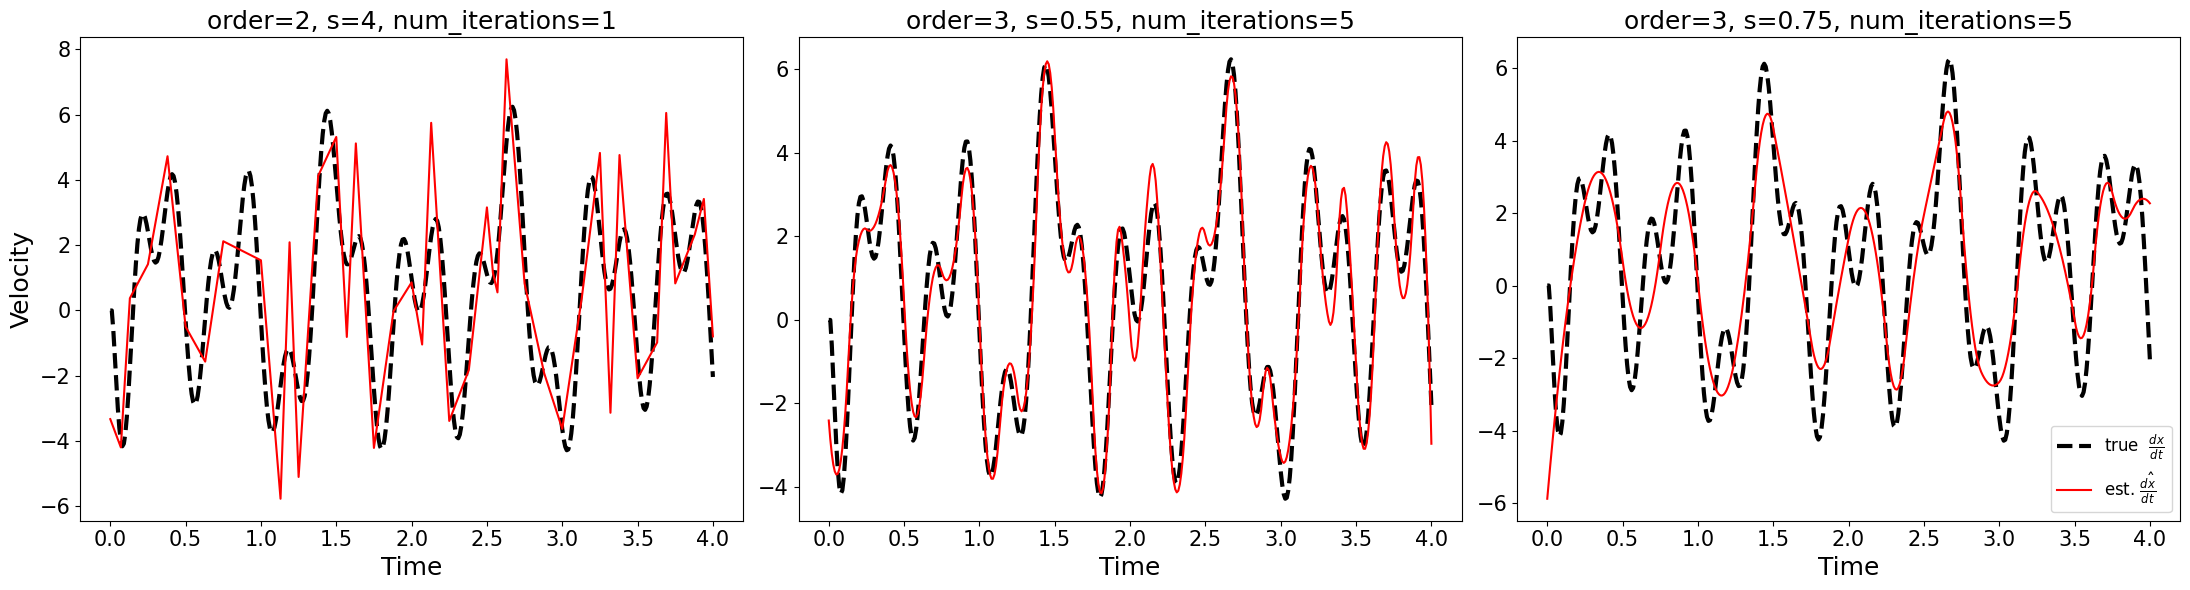

In [12]:
x_hat, dxdt_hat = pynumdiff.polynomial_fit.splinediff(x, dt, order=3, s=0.6, num_iterations=5)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

_, dxdt_hat1 = pynumdiff.polynomial_fit.splinediff(x, dt, order=2, s=4, num_iterations=1)
_, dxdt_hat2 = pynumdiff.polynomial_fit.splinediff(x, dt, order=3, s=0.55, num_iterations=5)
_, dxdt_hat3 = pynumdiff.polynomial_fit.splinediff(x, dt, order=3, s=0.75, num_iterations=5)

evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'order=2, s=4, num_iterations=1',
                         dxdt_hat2, 'order=3, s=0.55, num_iterations=5',
                         dxdt_hat3, 'order=3, s=0.75, num_iterations=5')

### 2.2 Sliding polynomial fit

RMS error in velocity:  0.8715805815814723
Error correlation:  0.02209867453652464


/Users/pavel/Code/PyNumDiff/pynumdiff/polynomial_fit/_polynomial_fit.py:79: UserWarning: Kernel window size should be odd. Added 1 to length.
  warn("Kernel window size should be odd. Added 1 to length.")


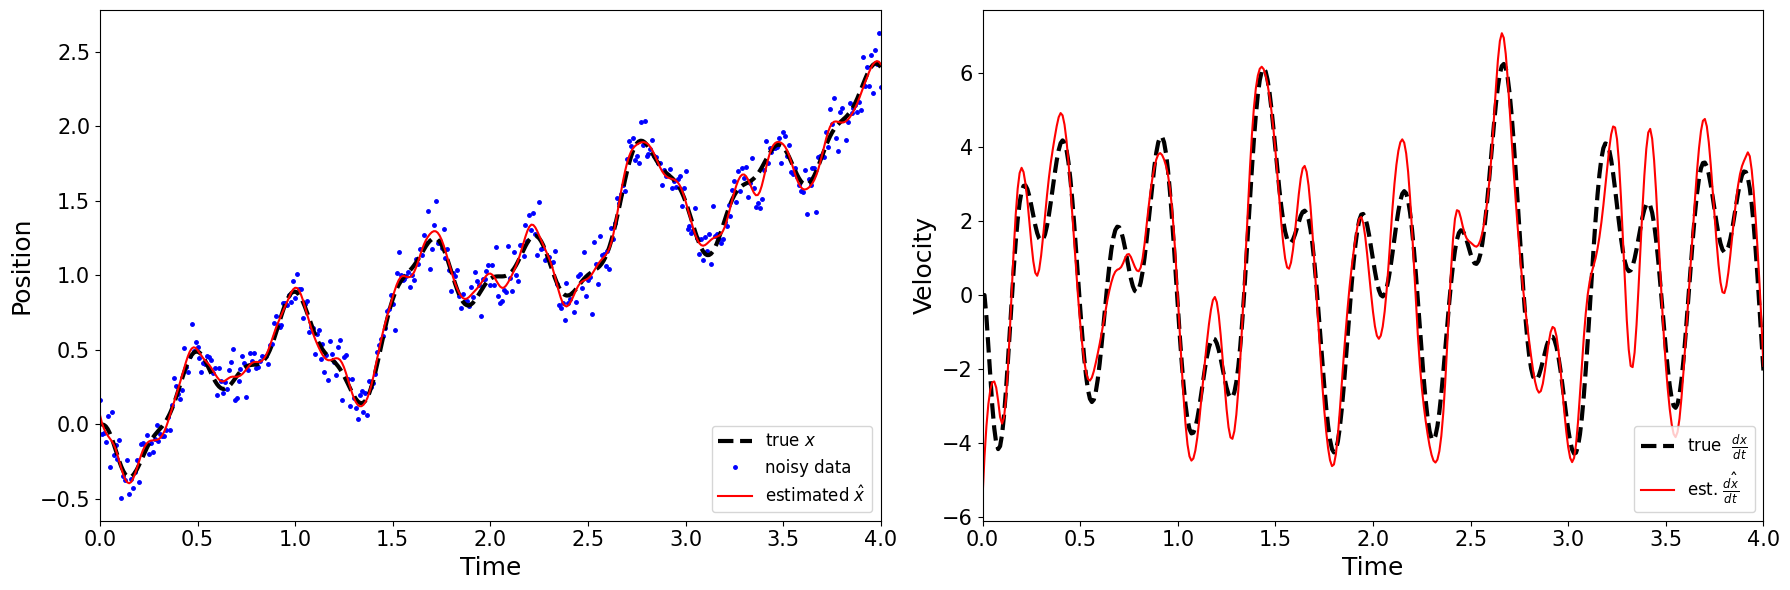

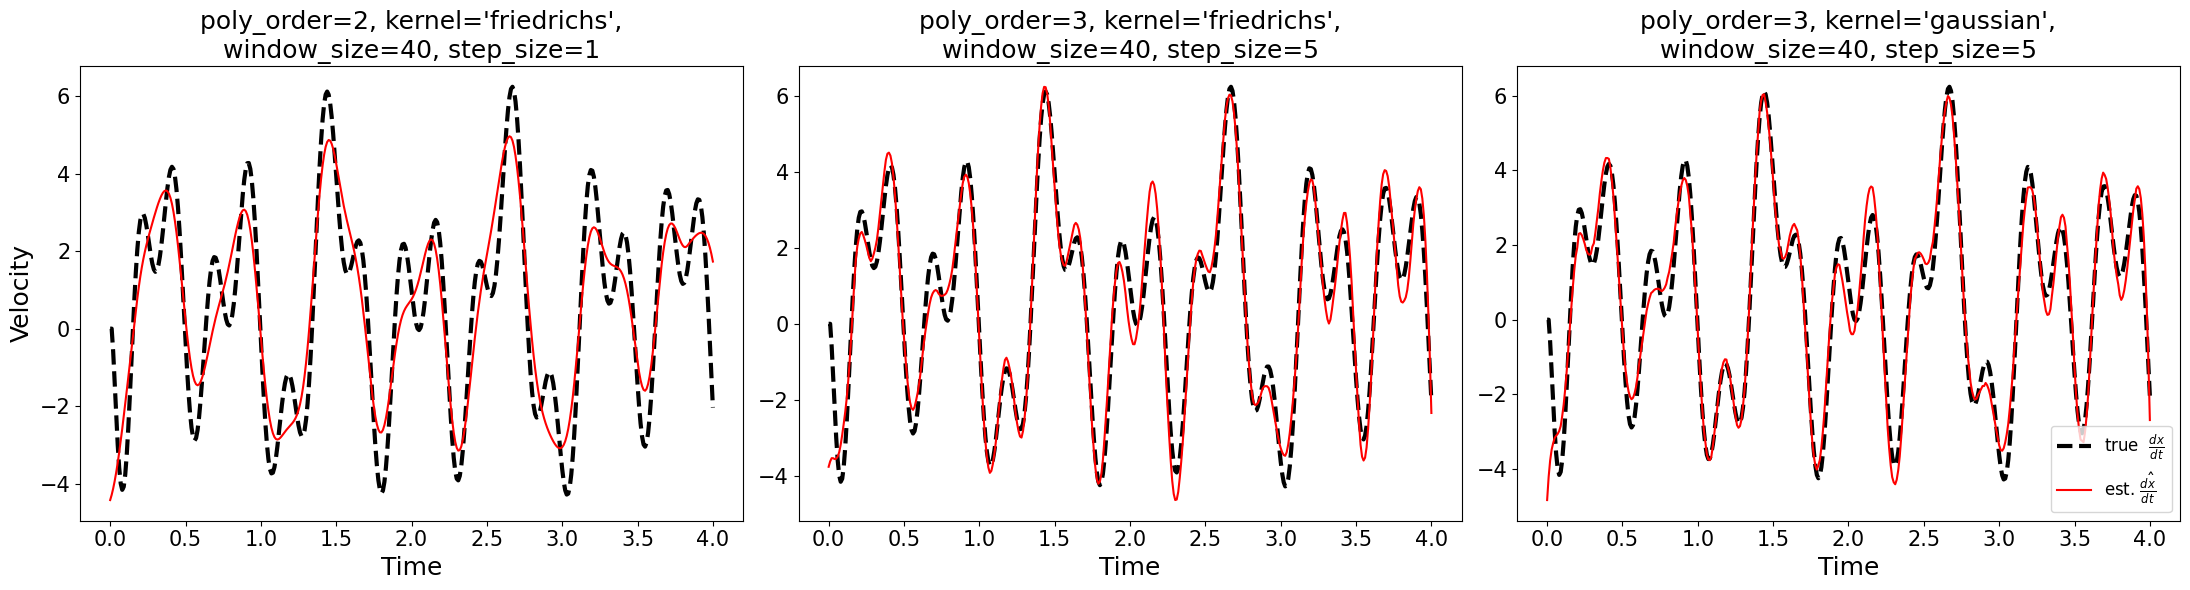

In [13]:
x_hat, dxdt_hat = pynumdiff.polynomial_fit.polydiff(x, dt, poly_order=2, window_size=21)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

_, dxdt_hat1 = pynumdiff.polynomial_fit.polydiff(x, dt, poly_order=2, kernel='friedrichs', window_size=40, step_size=1)
_, dxdt_hat2 = pynumdiff.polynomial_fit.polydiff(x, dt, poly_order=3, kernel='friedrichs', window_size=40, step_size=5)
_, dxdt_hat3 = pynumdiff.polynomial_fit.polydiff(x, dt, poly_order=3, kernel='gaussian', window_size=40, step_size=5)

evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, "poly_order=2, kernel='friedrichs',\nwindow_size=40, step_size=1",
                         dxdt_hat2, "poly_order=3, kernel='friedrichs',\nwindow_size=40, step_size=5",
                         dxdt_hat3, "poly_order=3, kernel='gaussian',\nwindow_size=40, step_size=5")

### 2.3 Savitzky-Golay filter

/Users/pavel/Code/PyNumDiff/pynumdiff/polynomial_fit/_polynomial_fit.py:127: UserWarning: Kernel window size should be odd. Added 1 to length.
  warn("Kernel window size should be odd. Added 1 to length.")


RMS error in velocity:  0.7838243617073721
Error correlation:  0.054293522523663026


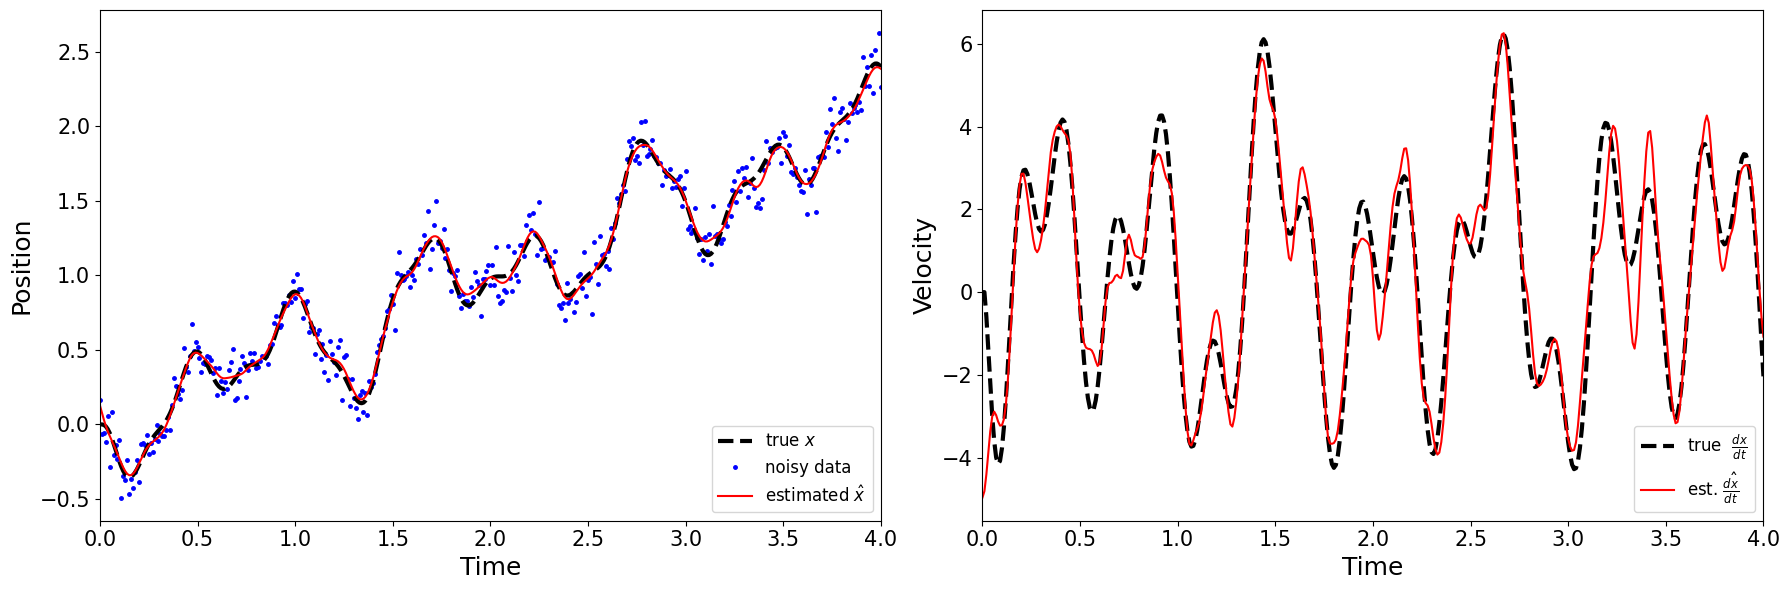

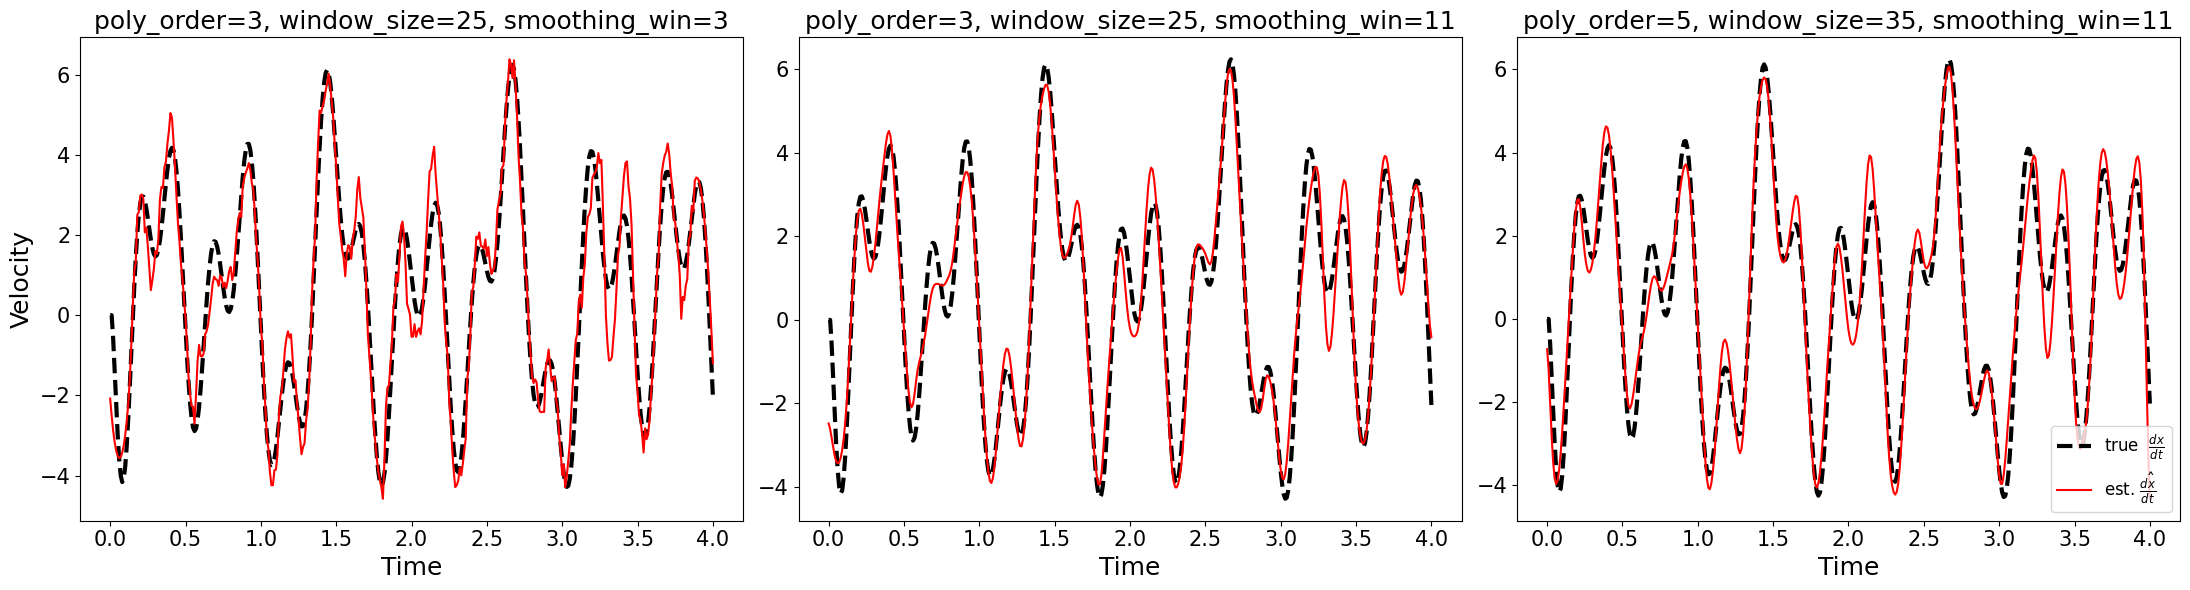

In [14]:
x_hat, dxdt_hat = pynumdiff.polynomial_fit.savgoldiff(x, dt, poly_order=2, window_size=10, smoothing_win=10)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

_, dxdt_hat1 = pynumdiff.polynomial_fit.savgoldiff(x, dt, poly_order=3, window_size=25, smoothing_win=3)
_, dxdt_hat2 = pynumdiff.polynomial_fit.savgoldiff(x, dt, poly_order=3, window_size=25, smoothing_win=11)
_, dxdt_hat3 = pynumdiff.polynomial_fit.savgoldiff(x, dt, poly_order=5, window_size=35, smoothing_win=11)

evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, "poly_order=3, window_size=25, smoothing_win=3",
                         dxdt_hat2, "poly_order=3, window_size=25, smoothing_win=11",
                         dxdt_hat3, "poly_order=5, window_size=35, smoothing_win=11")

## 3. Finite Difference

Here we use the general `finitediff` function. There are also module functions `first_order`, `second_order`, and `fourth_order`, which call the general function, with `order=1`, `2`, or `4`, respectively.

RMS error in velocity:  0.75636175258858
Error correlation:  0.06384224725565774


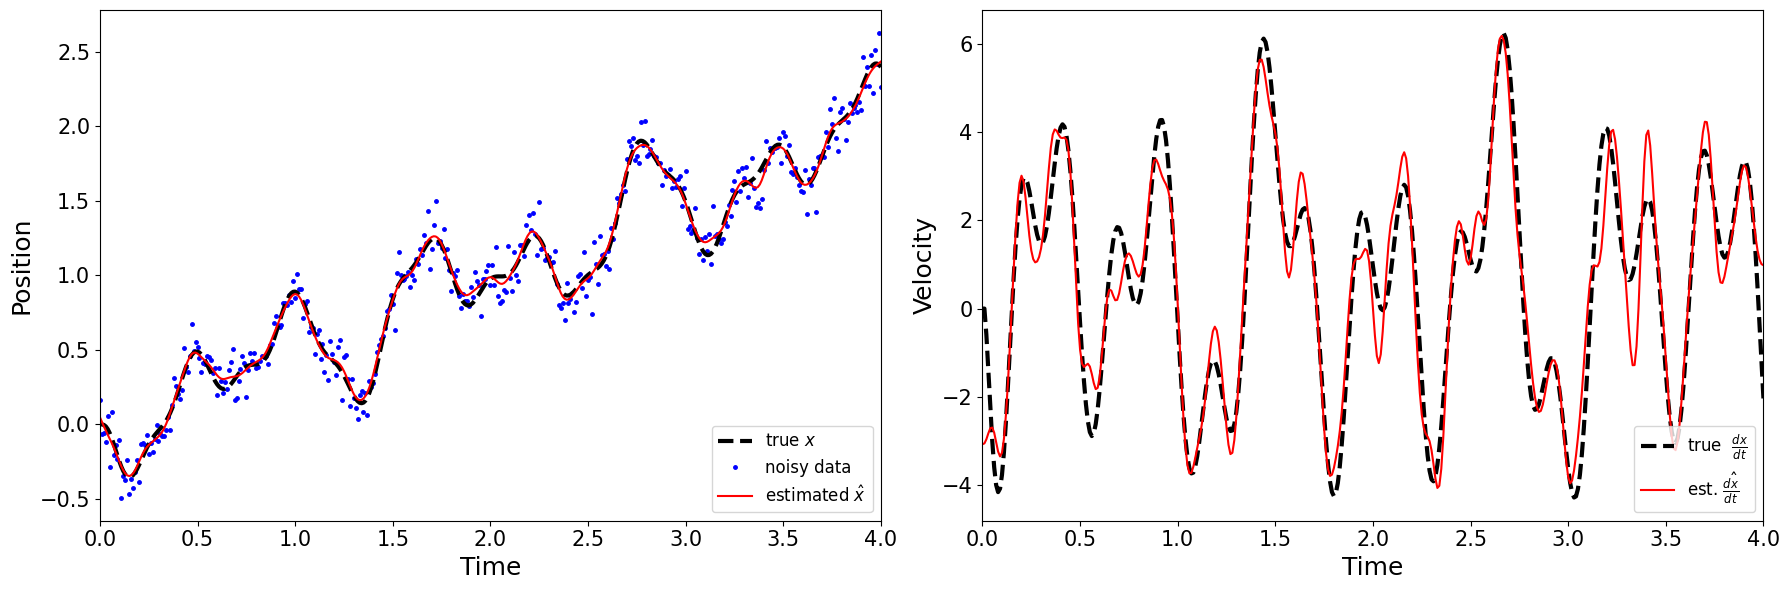

In [3]:
x_hat, dxdt_hat = pynumdiff.finitediff(x, dt, num_iterations=50, order=4)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.1 In the presence of noise, iterating is essential

Without iteration, finite difference methods really exaggerate noise, and some even incur extra blowup at the edges, because the FD formulas for the edges have large constants in the numerator, which amplify noise.

RMS error in velocity:  7.643954385214391
Error correlation:  0.0012610474551761064


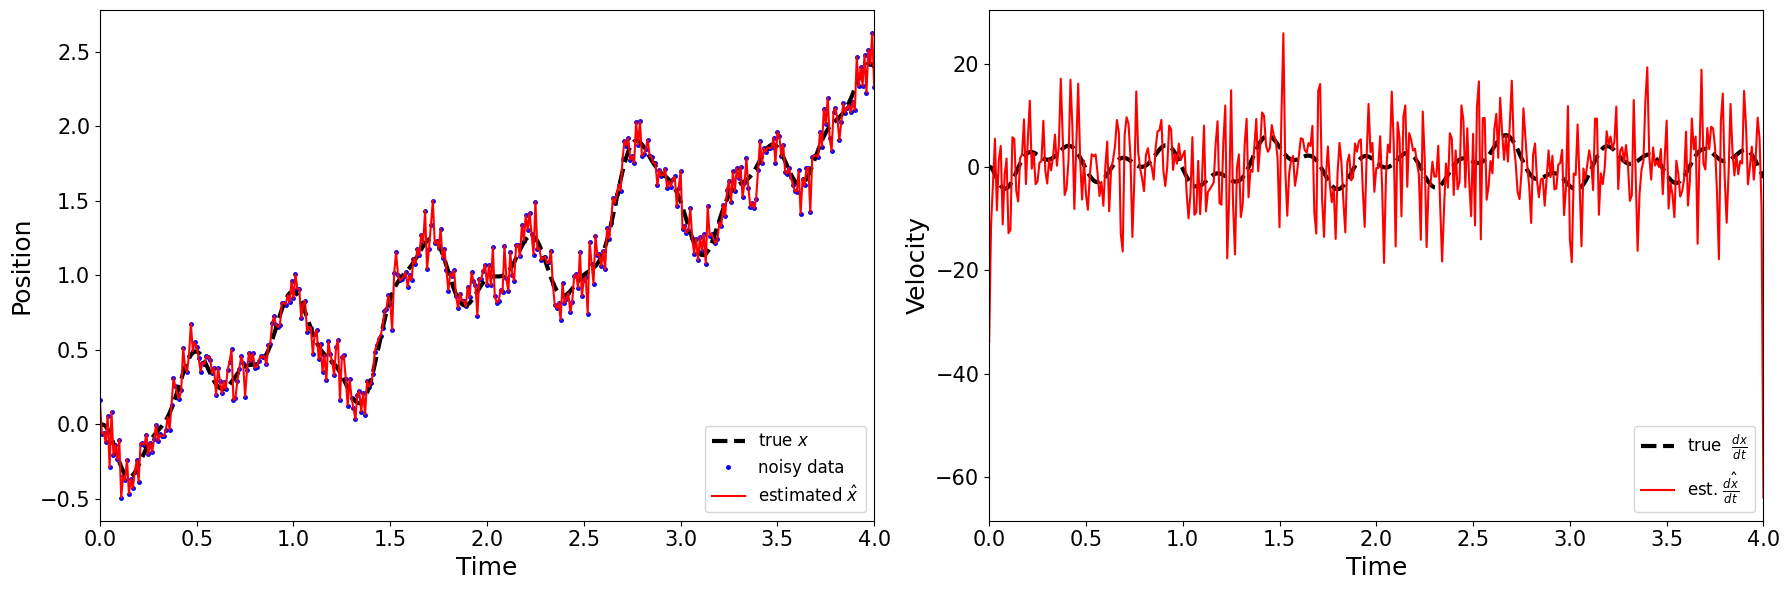

In [4]:
x_hat, dxdt_hat = pynumdiff.finite_difference.second_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.2 Iterating first order can cause a nasty shift

Note that iterating with `order=1` causes a shift, because the FD formula isn't centered:

RMS error in velocity:  6.81494138683291
Error correlation:  0.1557372179336233


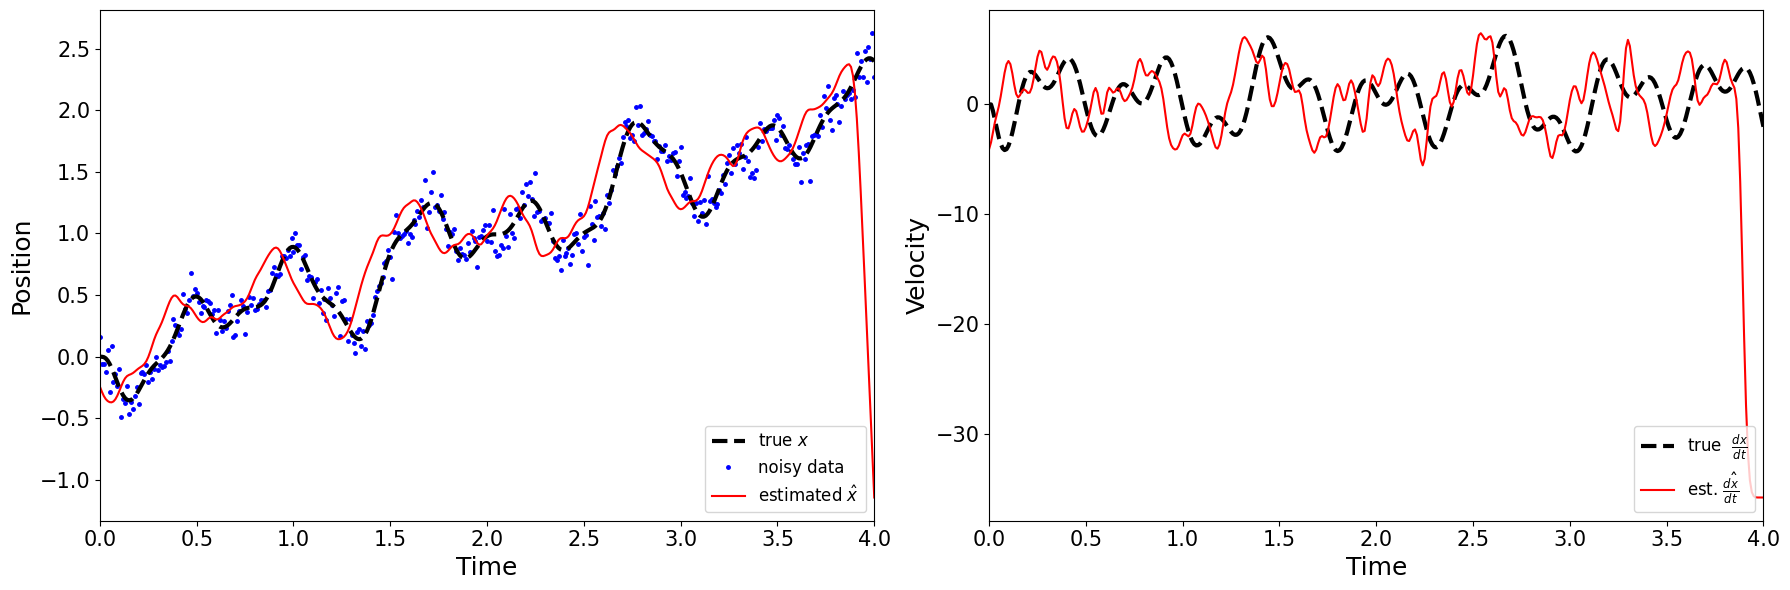

In [5]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt, num_iterations=20)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.3 Comparison of orders

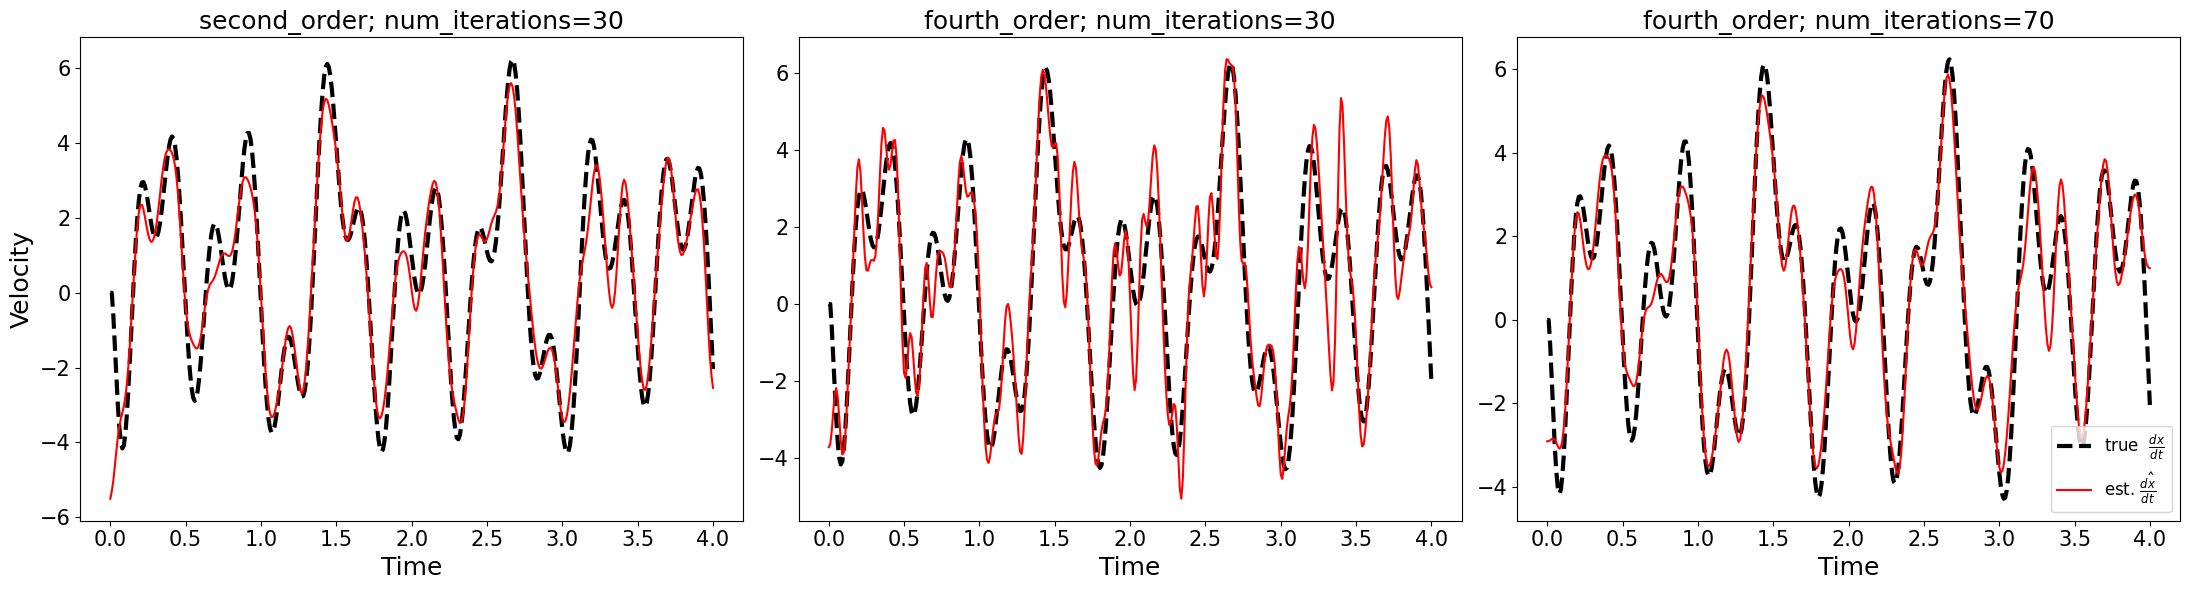

In [6]:
_, dxdt_hat1 = pynumdiff.finite_difference.second_order(x, dt, num_iterations=30)
_, dxdt_hat2 = pynumdiff.finite_difference.fourth_order(x, dt, num_iterations=30)
_, dxdt_hat3 = pynumdiff.finite_difference.fourth_order(x, dt, num_iterations=70)

evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'second_order; num_iterations=30',
                         dxdt_hat2, 'fourth_order; num_iterations=30',
                         dxdt_hat3, 'fourth_order; num_iterations=70')

## 4. Total Variation Regularization

Here we use the general `tvrdiff` function. There are also module functions `velocity`, `acceleration`, and `jerk`, which call the general function, with `order=1`, `2`, or `3`, respectively.

RMS error in velocity:  0.6199640976205407
Error correlation:  0.00809175095074607


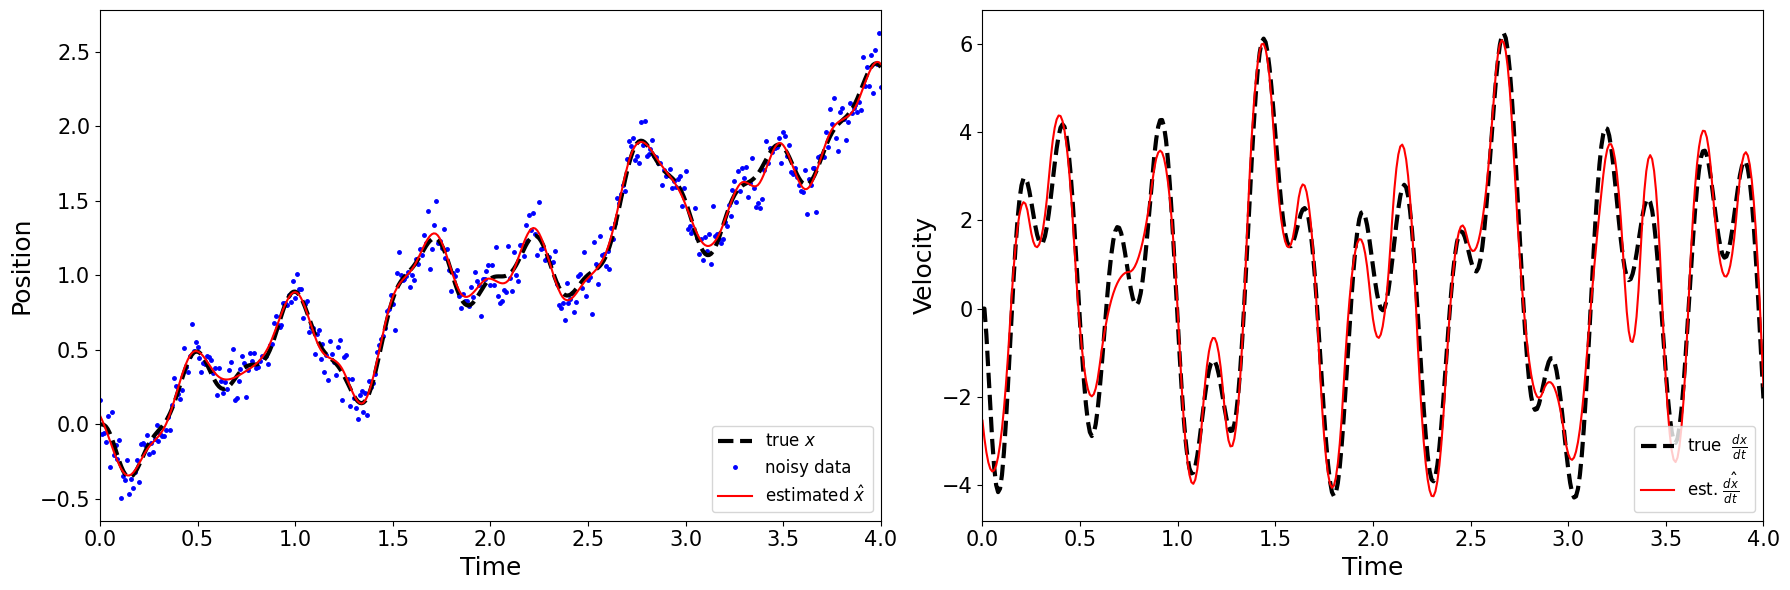

In [15]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.tvrdiff(x, dt, order=3, gamma=12)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

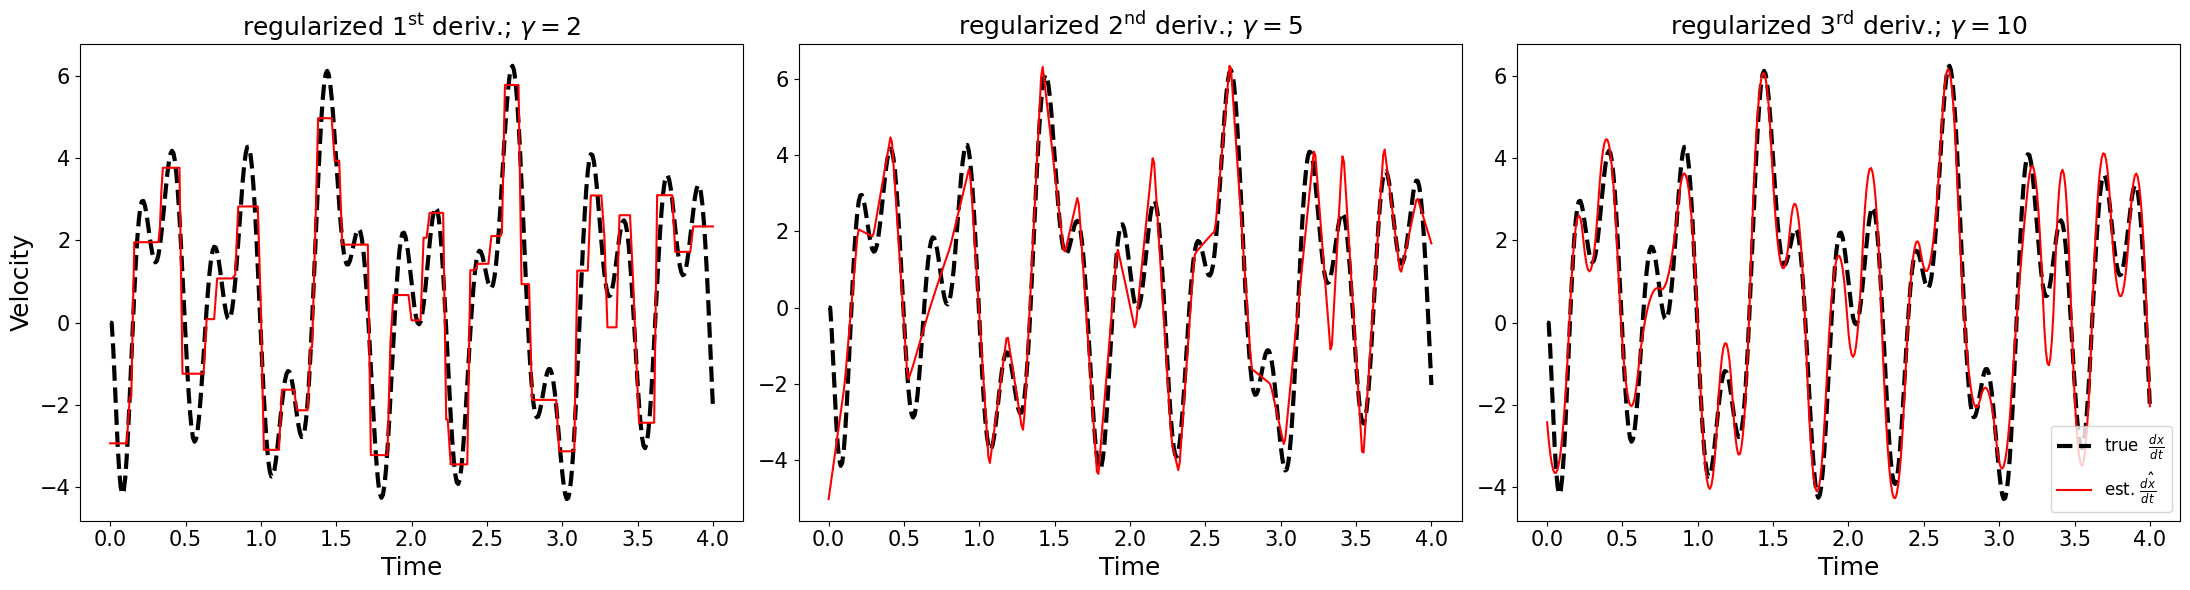

In [16]:
_, dxdt_hat1 = pynumdiff.total_variation_regularization.velocity(x, dt, gamma=2)
_, dxdt_hat2 = pynumdiff.total_variation_regularization.acceleration(x, dt, gamma=5)
_, dxdt_hat3 = pynumdiff.total_variation_regularization.jerk(x, dt, gamma=10)

evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, rf'regularized $1^\text{{st}}$ deriv.; $\gamma=2$',
                          dxdt_hat2, rf"regularized $2^\text{{nd}}$ deriv.; $\gamma=5$",
                          dxdt_hat3, rf'regularized $3^\text{{rd}}$ deriv.; $\gamma=10$')

### 4.1 In case you don't have a convex solver

There is also a way to approximate the `order=1` solution of the above via iterative algorithm, detailed in Rick Chartrand's "Numerical differentiation of noisy, nonsmooth data". It's pretty mathematically involved, but he provides a script, which we call out to in the `iterative_velocity` function.

RMS error in velocity:  0.894963866231348
Error correlation:  0.0063432820854903696


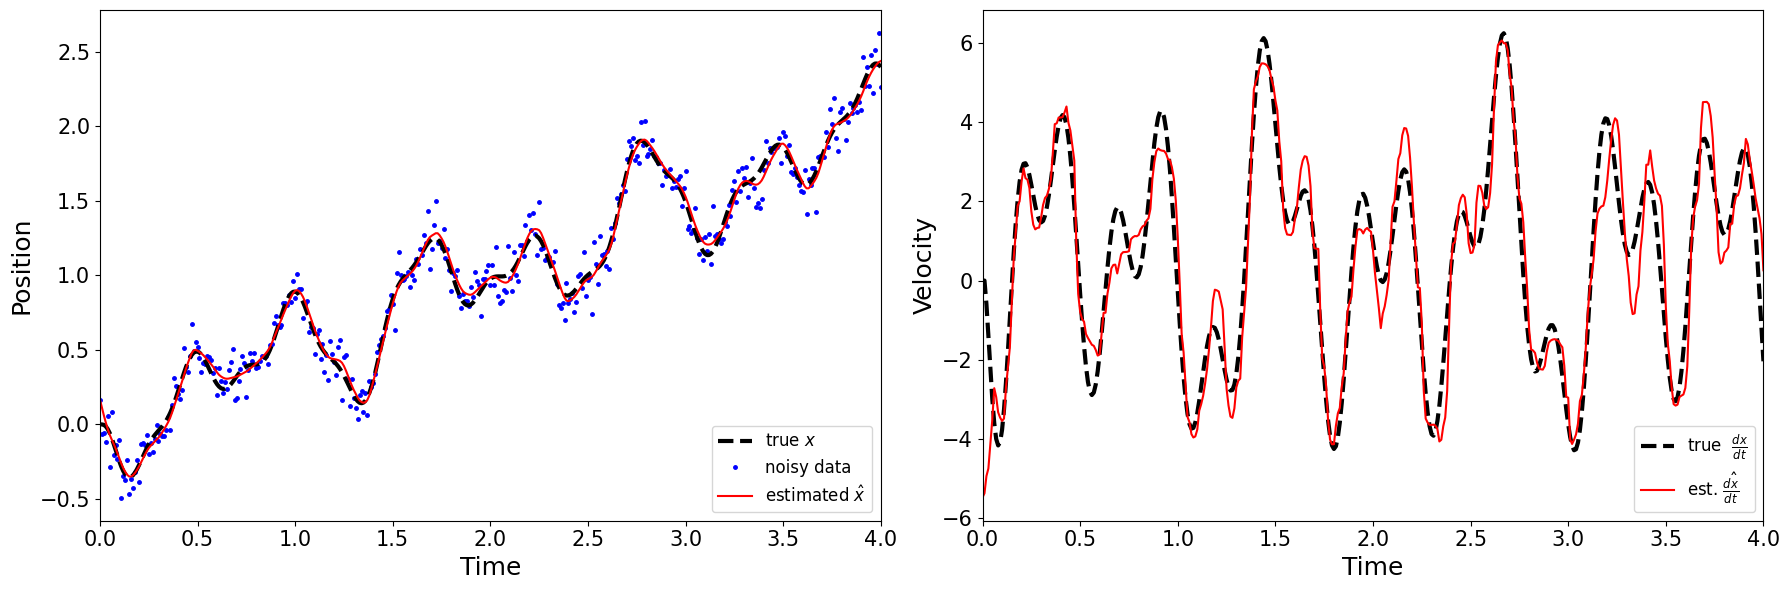

In [17]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.iterative_velocity(x, dt, num_iterations=1, gamma=0.001)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.2 Gaussian smoothing can be applied to get rid of sharp edges

TVR tends to select a sparse, stepwise solution for some derivative, which can leave sharp corners in first derivative estimations when order is 1 and 2.

RMS error in velocity:  0.7779066731647624
Error correlation:  0.0023699054852438293


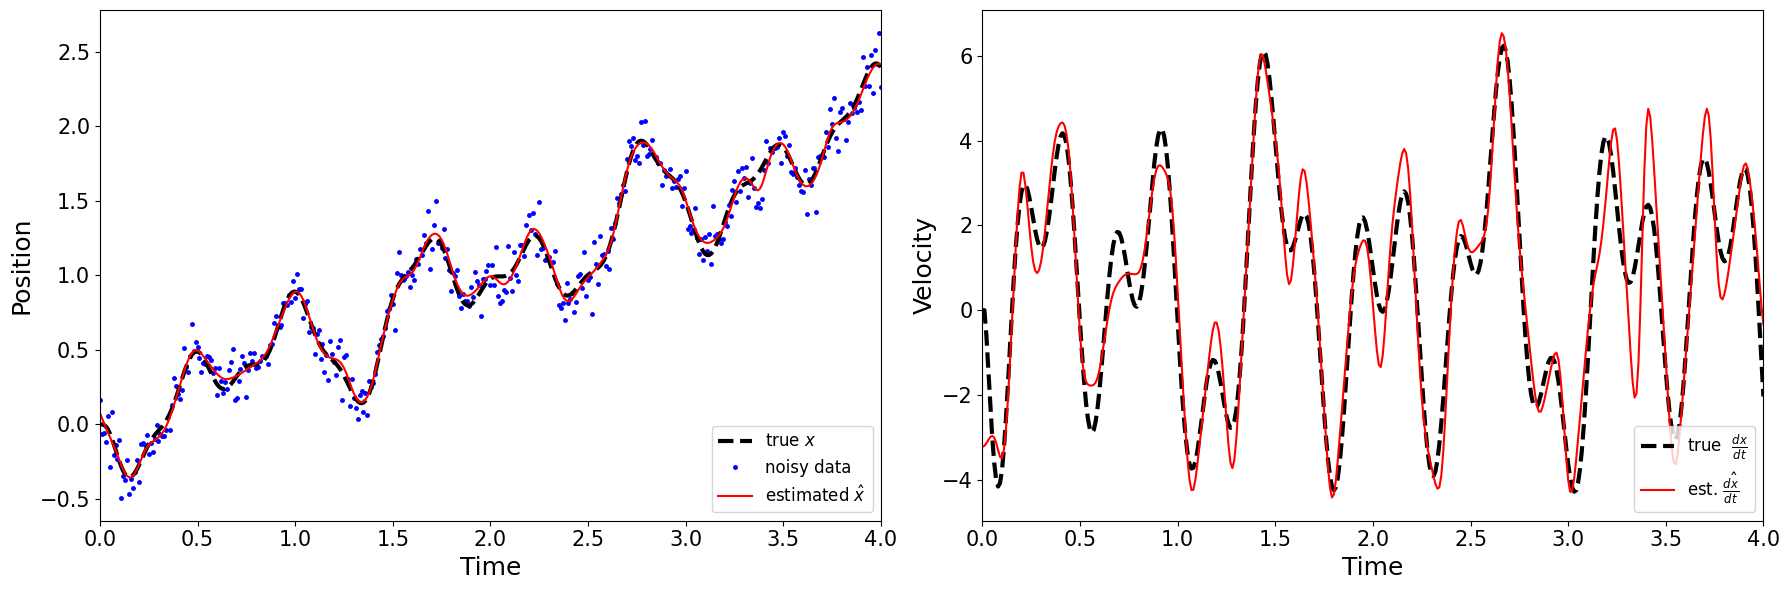

In [18]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.smooth_acceleration(x, dt, gamma=1, window_size=10)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.3 The method can be applied in a sliding window

This is similar to the approach taken by `polydiff`, except the idea is to keep the number of points manageable for the convex solver, because otherwise its results can sometimes be oversmooth.

RMS error in velocity:  0.8932661325707255
Error correlation:  0.0061137850713498445


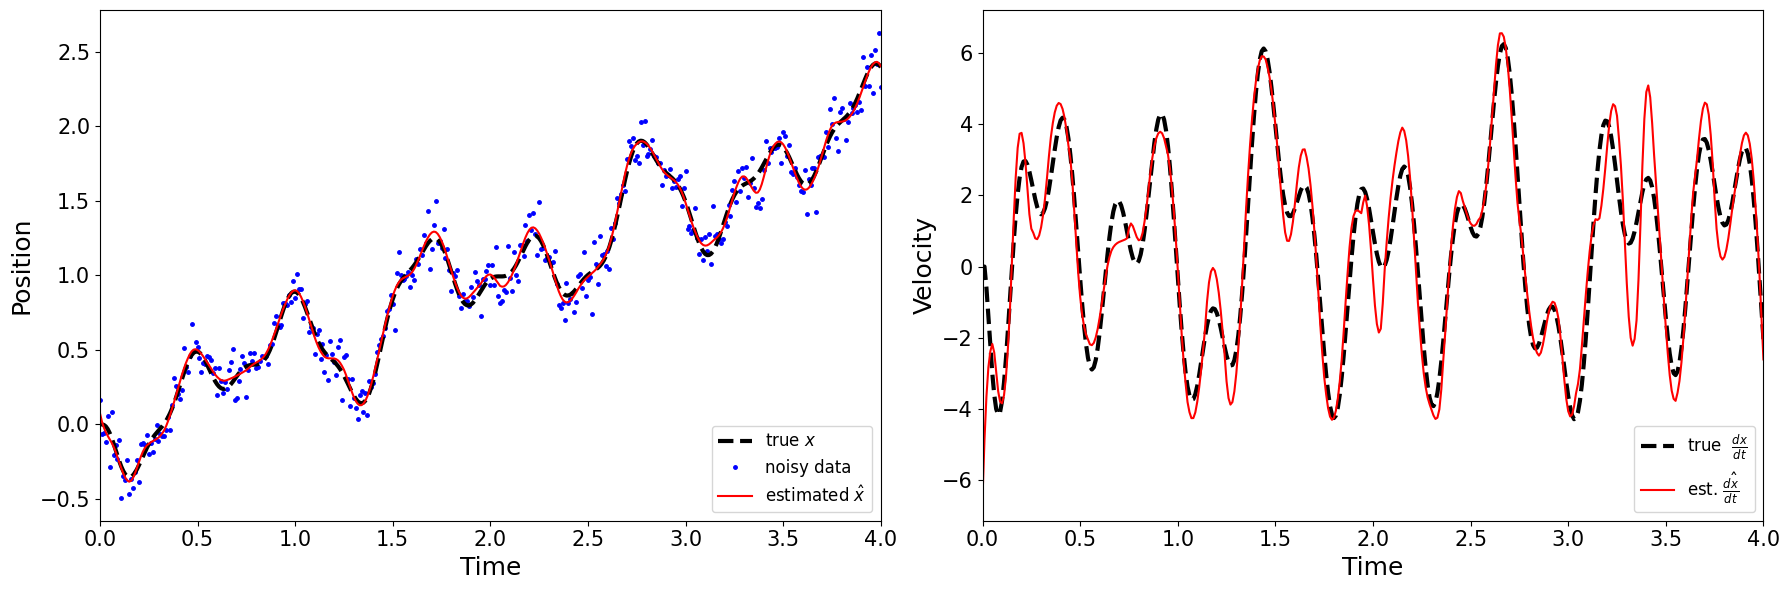

In [19]:
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.jerk_sliding(x, dt, gamma=10, window_size=51)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

## 5. Kalman smoothing

Here we use the general `rtsdiff` function. There are also module functions `constant_velocity`, `constant_acceleration`, and `constant_jerk`, which call the general function, with `order=1`, `2`, or `3`, respectively, and have separate `q` and `r` parameters rather than a `qr_ratio`.

RMS error in velocity:  0.627767979830003
Error correlation:  0.011057839026286478


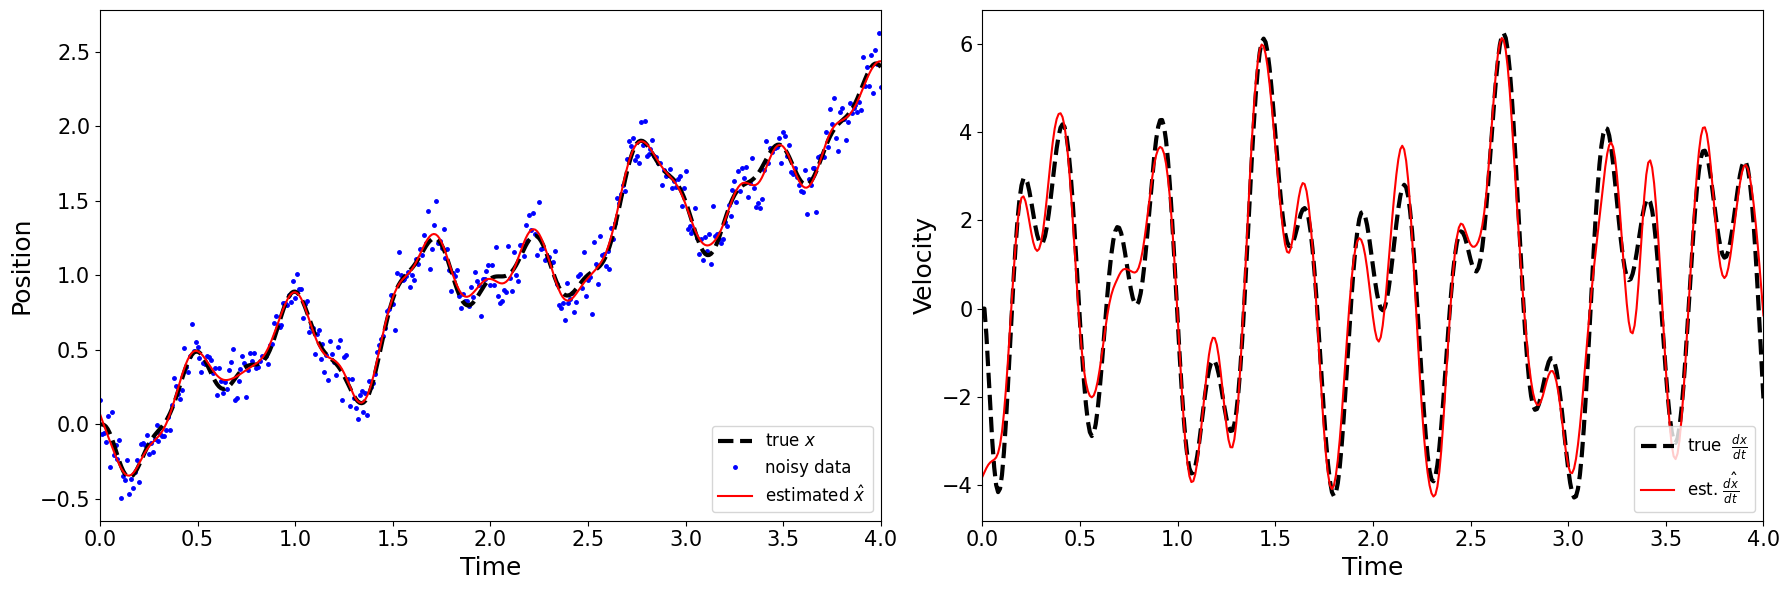

In [20]:
x_hat, dxdt_hat = pynumdiff.kalman_smooth.rtsdiff(x, dt, order=2, qr_ratio=1.2e5, forwardbackward=True)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

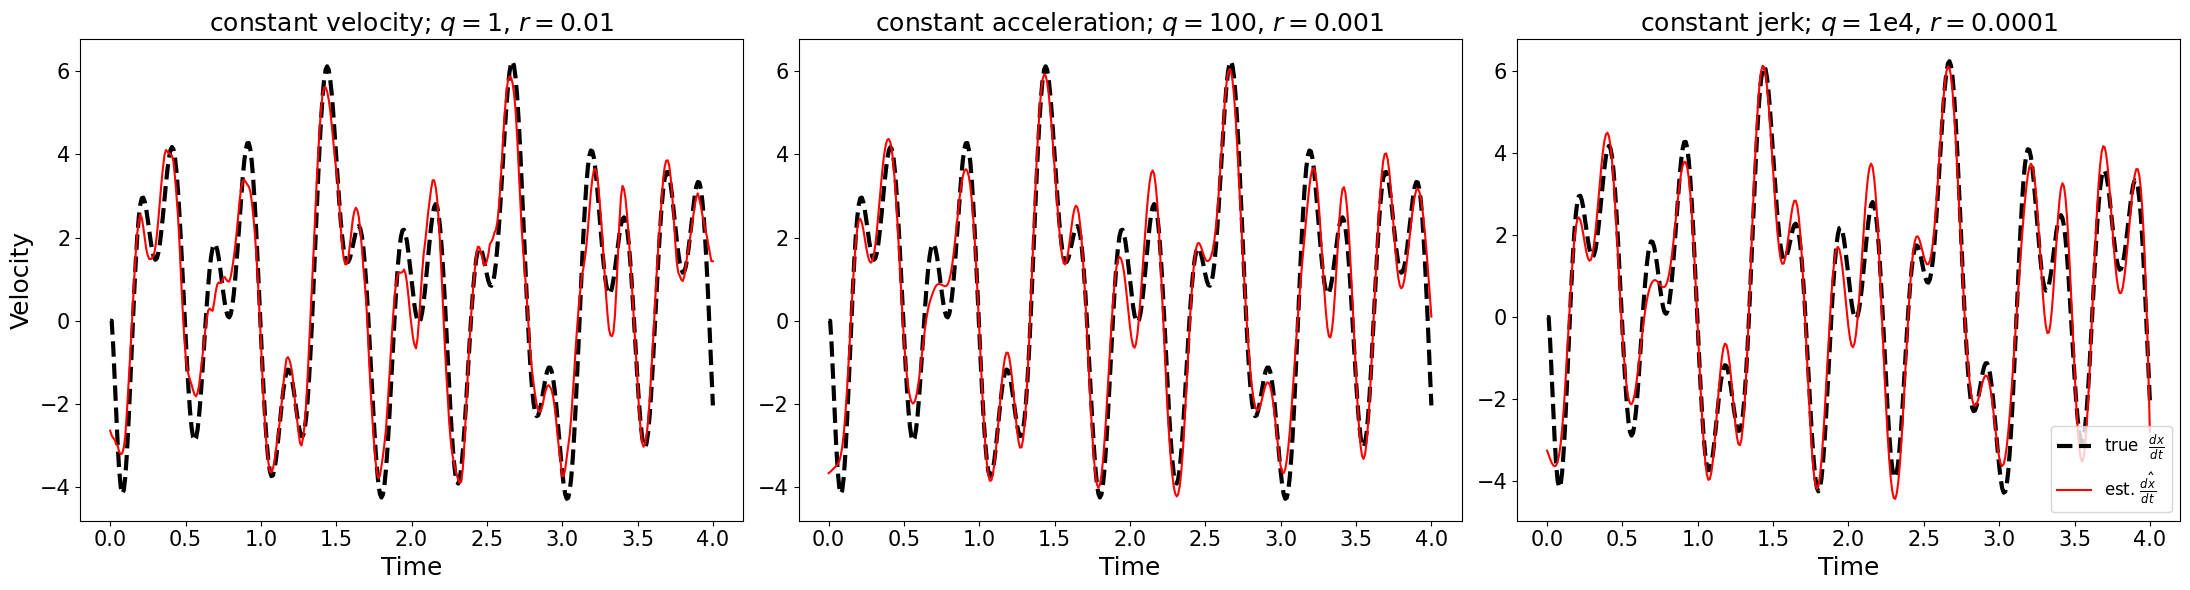

In [21]:
_, dxdt_hat1 = pynumdiff.kalman_smooth.constant_velocity(x, dt, forwardbackward=False, q=1, r=0.01)
_, dxdt_hat2 = pynumdiff.kalman_smooth.constant_acceleration(x, dt, forwardbackward=False, q=100, r=0.001)
_, dxdt_hat3 = pynumdiff.kalman_smooth.constant_jerk(x, dt, forwardbackward=False, q=1e4, r=0.0001)

evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, rf'constant velocity; $q=1$, $r=0.01$',
                          dxdt_hat2, rf"constant acceleration; $q=100$, $r=0.001$",
                          dxdt_hat3, rf'constant jerk; $q=1\text{{e}}4$, $r=0.0001$')

## 6. Linear Models

### 6.1 Spectral derivative

RMS error in velocity:  0.5808003979368493
Error correlation:  0.00024804164864671935


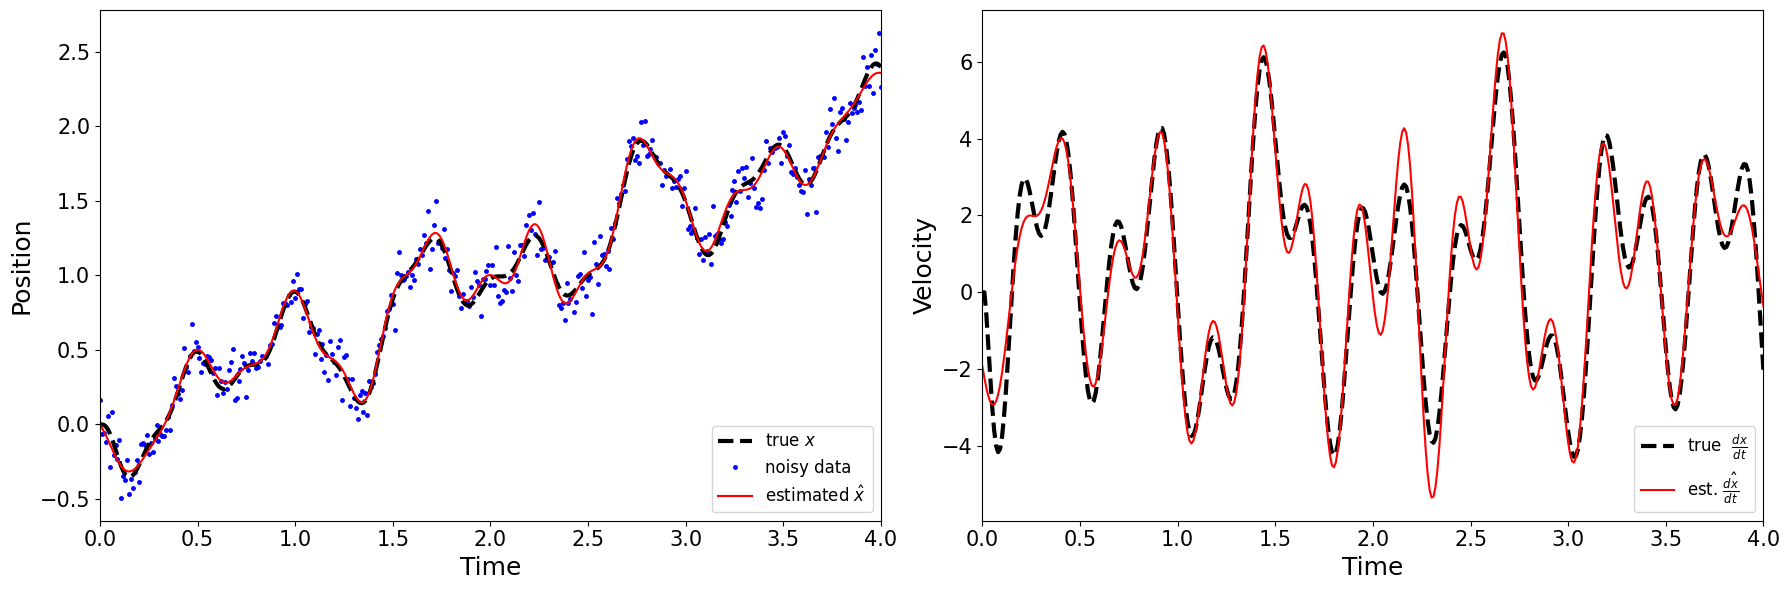

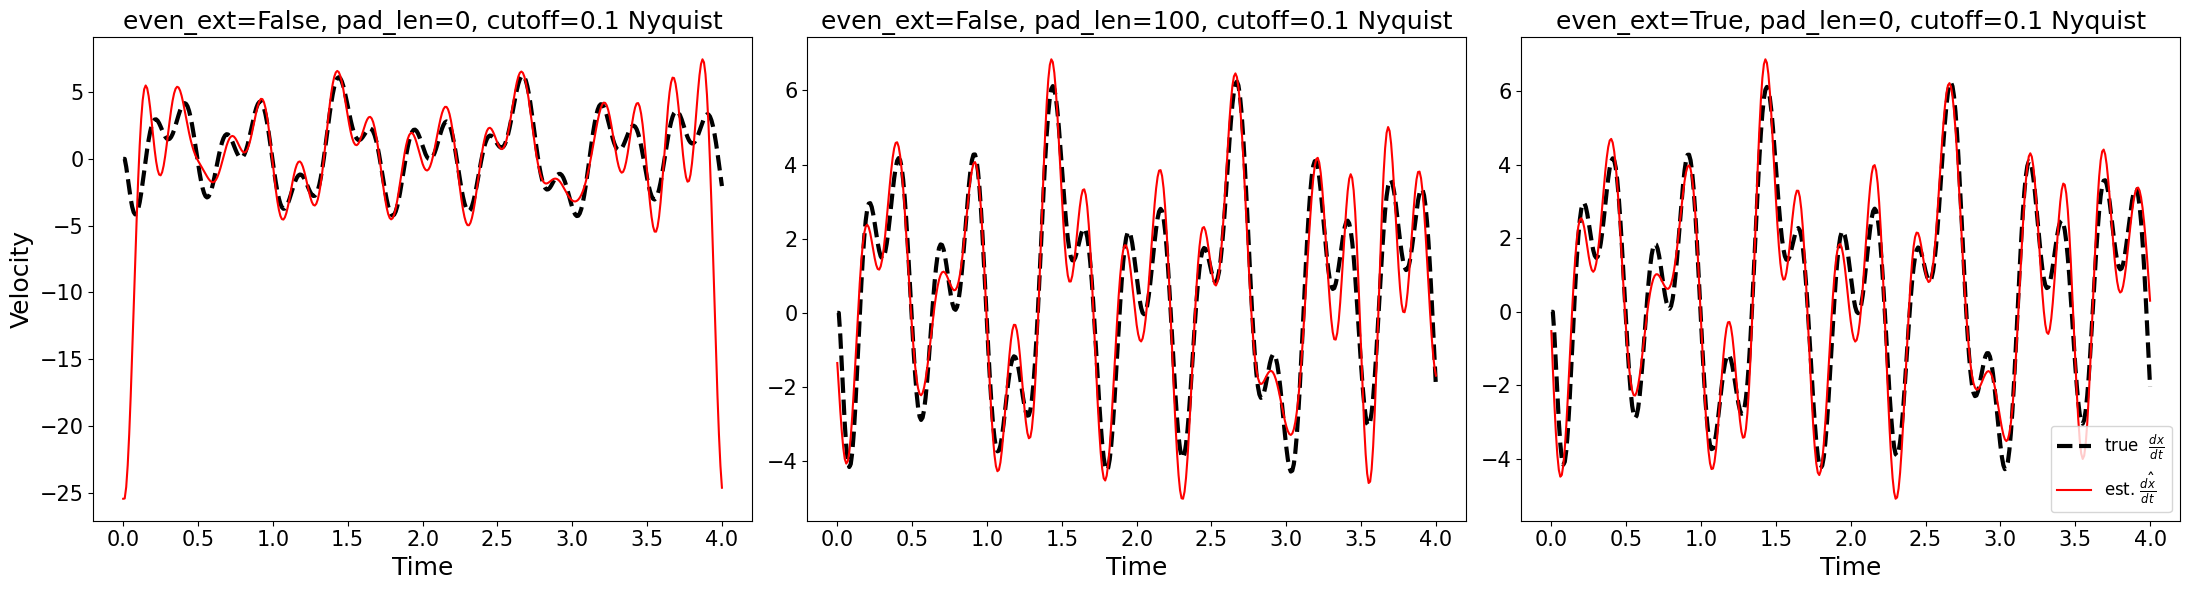

In [22]:
x_hat, dxdt_hat = pynumdiff.linear_model.spectraldiff(x, dt, even_extension=True, pad_to_zero_dxdt=True, high_freq_cutoff=0.085)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

_, dxdt_hat1 = pynumdiff.linear_model.spectraldiff(x, dt, even_extension=False, pad_to_zero_dxdt=False, high_freq_cutoff=0.1)
_, dxdt_hat2 = pynumdiff.linear_model.spectraldiff(x, dt, even_extension=False, pad_to_zero_dxdt=True, high_freq_cutoff=0.1)
_, dxdt_hat3 = pynumdiff.linear_model.spectraldiff(x, dt, even_extension=True, pad_to_zero_dxdt=False, high_freq_cutoff=0.1)

evaluate.plot_comparison(dt, dxdt_truth, dxdt_hat1, 'even_ext=False, pad_len=0, cutoff=0.1 Nyquist',
                           dxdt_hat2, 'even_ext=False, pad_len=100, cutoff=0.1 Nyquist',
                           dxdt_hat3, 'even_ext=True, pad_len=0, cutoff=0.1 Nyquist')

### 6.2 Sliding linear time invariant system fit

/usr/local/lib/python3.13/site-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


RMS error in velocity:  1.1307709443649918
Error correlation:  0.3628719661459705


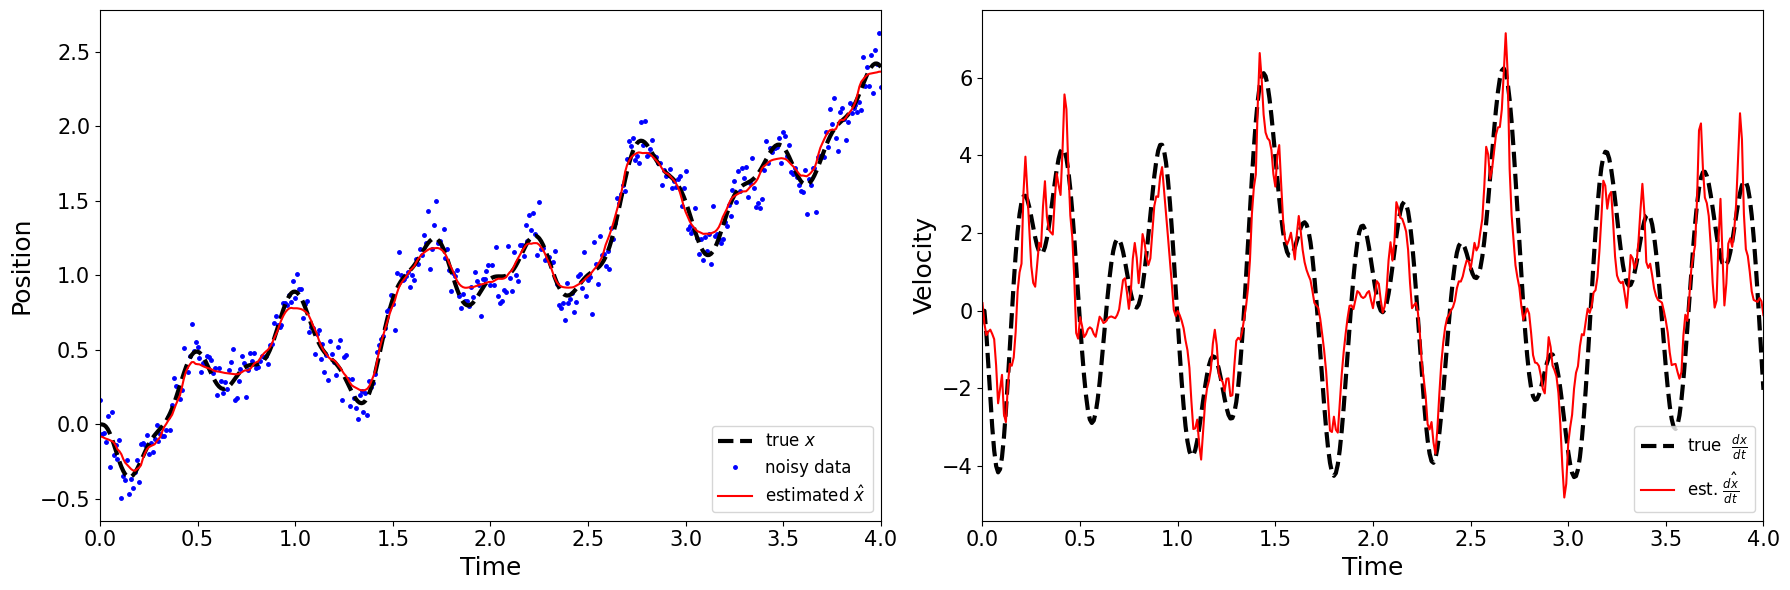

In [23]:
x_hat, dxdt_hat = pynumdiff.linear_model.lineardiff(x, dt, order=3, gamma=10, window_size=21)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)